In [10]:
import pickle
import pandas as pd
from collections import Counter
import ast

print("="*60)
print("FACTKG DATA EXPLORATION")
print("="*60)

# Load FactKG dataset
print("\n1. Loading FactKG training data...")
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

# Get basic info without printing large data
if isinstance(train_data, dict) and 'claim' in train_data:
    claims = train_data['claim']
    labels = train_data['label']
    entities = train_data.get('entities', [])
    
    print(f"   Number of training examples: {len(claims)}")
    
    # Show first example
    print("\n2. First training example:")
    print(f"   Claim: {claims[0]}")
    print(f"   Label: {labels[0]}")
    if entities:
        print(f"   Entities: {entities[0][:100] if len(str(entities[0])) > 100 else entities[0]}")
    
    # Label distribution
    print("\n3. Label distribution:")
    label_counts = Counter(labels)
    for label, count in sorted(label_counts.items()):
        print(f"   Label {label}: {count} ({count/len(labels)*100:.1f}%)")
    
    # Check for reasoning types
    print("\n4. Checking for reasoning types...")
    if 'reasoning_type' in train_data:
        reasoning_types = train_data['reasoning_type']
        print("   Reasoning type distribution:")
        for rtype, count in Counter(reasoning_types).most_common():
            print(f"      {rtype}: {count} ({count/len(reasoning_types)*100:.1f}%)")
    else:
        print("   No reasoning_type field found")

# Load validation and test
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_dev.pickle', 'rb') as f:
    val_data = pickle.load(f)
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

if isinstance(val_data, dict) and 'claim' in val_data:
    print(f"   Number of validation examples: {len(val_data['claim'])}")
if isinstance(test_data, dict) and 'claim' in test_data:
    print(f"   Number of test examples: {len(test_data['claim'])}")

# Load subgraphs (they are pandas DataFrames)
print("\n5. Analyzing subgraphs...")
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/subgraphs/subgraphs_one_hop_train.pkl', 'rb') as f:
    subgraphs_train = pickle.load(f)

print(f"   Type of subgraphs_train: {type(subgraphs_train)}")
print(f"   Shape: {subgraphs_train.shape}")
print(f"   Columns: {list(subgraphs_train.columns)}")

# Analyze subgraph sizes
print("\n6. Subgraph size statistics (first 1000 examples):")
subgraph_sizes = []
num_to_check = min(1000, len(subgraphs_train))

for i in range(num_to_check):
    subgraph = subgraphs_train.iloc[i]['subgraph']
    if isinstance(subgraph, list):
        subgraph_sizes.append(len(subgraph))

if subgraph_sizes:
    print(f"   Samples analyzed: {len(subgraph_sizes)}")
    print(f"   Min triples: {min(subgraph_sizes)}")
    print(f"   Max triples: {max(subgraph_sizes)}")
    print(f"   Mean triples: {sum(subgraph_sizes)/len(subgraph_sizes):.1f}")
    print(f"   Median triples: {sorted(subgraph_sizes)[len(subgraph_sizes)//2]}")

# Show a sample claim with subgraph
print("\n7. Sample claim with subgraph:")
if isinstance(train_data, dict) and 'claim' in train_data:
    sample_claim = train_data['claim'][0]
    sample_label = train_data['label'][0]
    sample_entities = train_data['entities'][0] if 'entities' in train_data else 'N/A'
    
    print(f"   Claim: {sample_claim}")
    print(f"   Label: {sample_label}")
    print(f"   Entities: {sample_entities}")
    
    # Get corresponding subgraph
    sample_subgraph = subgraphs_train.iloc[0]['subgraph']
    if isinstance(sample_subgraph, list):
        print(f"   Number of triples in subgraph: {len(sample_subgraph)}")
        print(f"   First 5 triples:")
        for triple in sample_subgraph[:5]:
            print(f"      {triple}")

print("\n" + "="*60)
print("Data exploration complete!")
print("="*60)

FACTKG DATA EXPLORATION

1. Loading FactKG training data...

5. Analyzing subgraphs...
   Type of subgraphs_train: <class 'pandas.core.frame.DataFrame'>
   Shape: (86367, 2)
   Columns: ['subgraph', 'walked']

6. Subgraph size statistics (first 1000 examples):

7. Sample claim with subgraph:

Data exploration complete!


In [11]:
import pickle
import pandas as pd

print("Checking train_data structure...")
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

print(f"Type: {type(train_data)}")

if isinstance(train_data, dict):
    print(f"Keys: {list(train_data.keys())}")
    for key in train_data.keys():
        print(f"  {key}: type={type(train_data[key])}, len={len(train_data[key]) if hasattr(train_data[key], '__len__') else 'N/A'}")
    
    # Try to access first claim
    if 'claim' in train_data:
        print(f"\nFirst claim: {train_data['claim'][0]}")
        print(f"First label: {train_data['label'][0]}")

print("\nChecking subgraph structure...")
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/subgraphs/subgraphs_one_hop_train.pkl', 'rb') as f:
    subgraphs = pickle.load(f)

print(f"Subgraphs shape: {subgraphs.shape}")
print(f"Columns: {list(subgraphs.columns)}")
print(f"\nFirst row 'subgraph' type: {type(subgraphs.iloc[0]['subgraph'])}")
print(f"First row 'walked' type: {type(subgraphs.iloc[0]['walked'])}")

# Check if subgraph is a list
if isinstance(subgraphs.iloc[0]['subgraph'], list):
    print(f"First subgraph length: {len(subgraphs.iloc[0]['subgraph'])}")
    if len(subgraphs.iloc[0]['subgraph']) > 0:
        print(f"First triple: {subgraphs.iloc[0]['subgraph'][0]}")

Checking train_data structure...


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



  Tom Sizemore, married to Maeve Quinlan, stars in the film with Adam West.: type=<class 'dict'>, len=4
  An university in India is affiliated to Visvesvaraya Technological University located in the city of Belgaum.: type=<class 'dict'>, len=4
  The album, by the proto-punk group The Velvet Underground, fits into the Rock music genre.: type=<class 'dict'>, len=4
  A soccer club has the nickname of Asa Gigante and they play in the Campeonato Brasileiro Série C league in Brazil.: type=<class 'dict'>, len=4
  MotorSport Vision, founded in 2004, operates the airport which has a runway.: type=<class 'dict'>, len=4
  The university, located in India is affiliated with the Belgaum University, Visvesvaraya Technological University.: type=<class 'dict'>, len=4
  Pontiac made the Pontiac Rageous on their assembly line in Michigan!: type=<class 'dict'>, len=4
  A company is located in Quezon City in the Philippines, whose total area is 165.33.: type=<class 'dict'>, len=4
  A soccer club nicknamed

In [3]:
import pickle
import pandas as pd
from collections import Counter
import warnings

# Suppress warnings if any (e.g., from pickle loading)
warnings.filterwarnings('ignore')

print("="*60)
print("FACTKG DATA EXPLORATION (v5 - Corrected)")
print("="*60)

# --- Sections 1-4 are unchanged and correct ---

# 1. Load FactKG dataset
print("\n1. Loading FactKG training data...")
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

claims = list(train_data.keys())
print(f"   Number of training examples: {len(claims)}")

# 2. Show first example
print("\n2. First training example:")
first_claim = claims[0]
first_data = train_data[first_claim]
print(f"   Claim: {first_claim}")
print(f"   Metadata keys: {list(first_data.keys())}")
for key, value in first_data.items():
    print(f"   {key}: {value}")

# 3. Label distribution
print("\n3. Label distribution:")
labels = [train_data[claim]['Label'][0] for claim in claims]
label_counts = Counter(labels)
for label, count in sorted(label_counts.items()):
    print(f"   Label '{label}': {count} ({count/len(labels)*100:.1f}%)")

# 4. Reasoning types
print("\n4. Reasoning type distribution:")
all_reasoning_types = []
for claim in claims:
    all_reasoning_types.extend(train_data[claim].get('types', []))
reasoning_counts = Counter(all_reasoning_types)
total_types = len(all_reasoning_types)
for rtype, count in reasoning_counts.most_common(10): # Show top 10
    print(f"   {rtype}: {count} ({count/total_types*100:.1f}%)")

# Load validation and test
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_dev.pickle', 'rb') as f:
    val_data = pickle.load(f)
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/factkg/factkg_test.pickle', 'rb') as f:
    test_data = pickle.load(f)
print(f"   Number of validation examples: {len(val_data)}")
print(f"   Number of test examples: {len(test_data)}")

# =========================================================
# FIX 1: Load the DataFrame and DO NOT merge.
# =========================================================
print("\n5. Analyzing subgraphs (from DataFrame)...")
with open('/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/subgraphs/subgraphs_one_hop_train.pkl', 'rb') as f:
    subgraphs_df = pickle.load(f)

print(f"   Subgraphs DataFrame shape: {subgraphs_df.shape}")
print(f"   Columns: {subgraphs_df.columns.to_list()}")

# =========================================================
# FIX 2: Analyze sizes by applying a function to the 'subgraph' COLUMN
# =========================================================
print("\n6. Subgraph size statistics (from ALL rows):")

def get_total_triples(subgraph_dict):
    # This counts the *actual triples* (relations) in the subgraph dict
    # e.g., {'Entity_A': [['rel1'], ['rel2']]} has size 2
    if not isinstance(subgraph_dict, dict):
        return 0
    total_triples = 0
    for entity_relations in subgraph_dict.values():
        total_triples += len(entity_relations)
    return total_triples

# Use .apply() to get the size for EVERY row
subgraph_sizes = subgraphs_df['subgraph'].apply(get_total_triples)

if not subgraph_sizes.empty:
    print(f"   Samples analyzed: {len(subgraph_sizes)}")
    print(f"   Min triples: {subgraph_sizes.min()}")
    print(f"   Max triples: {subgraph_sizes.max()}")
    print(f"   Mean triples: {subgraph_sizes.mean():.1f}")
    print(f"   Median triples: {subgraph_sizes.median()}")
    zero_triples = (subgraph_sizes == 0).sum()
    print(f"   Subgraphs with 0 triples: {zero_triples} ({(zero_triples/len(subgraph_sizes))*100:.1f}%)")
else:
    print("   Could not calculate subgraph sizes.")

# =========================================================
# FIX 3: Get the sample subgraph by its ROW INDEX (iloc[0])
# =========================================================
print("\n7. Sample claim with subgraph:")
sample_claim = first_claim # Use the same sample from Section 2
sample_data = train_data[sample_claim]

print(f"   Claim: {sample_claim}")
print(f"   Label: {sample_data['Label'][0]}")
print(f"   Reasoning type: {sample_data.get('types', 'N/A')}")
print(f"   Entities: {sample_data.get('Entity_set', 'N/A')}")

# Get the corresponding subgraph from ROW 0
try:
    # This is the correct way to get the subgraph for the first claim
    sample_subgraph_dict = subgraphs_df.iloc[0]['subgraph']
    
    if isinstance(sample_subgraph_dict, dict):
        print(f"   --- Subgraph Found (from row 0) ---")
        print(f"   Number of entities in subgraph: {len(sample_subgraph_dict)}")
        
        total_triples = get_total_triples(sample_subgraph_dict)
        print(f"   Number of triples in subgraph: {total_triples}")
        
        print(f"   Subgraph Content (first 5 triples):")
        count = 0
        for entity, relations in sample_subgraph_dict.items():
            if count >= 5:
                break
            for rel_list in relations:
                if count >= 5:
                    break
                # rel_list is [relation], so access rel_list[0]
                print(f"       ({entity}, {rel_list[0]}, ?)")
                count += 1
        if total_triples == 0:
            print("       (Subgraph is empty)")
            
    else:
        print(f"   Subgraph for this claim is not a dict (type: {type(sample_subgraph_dict)})")
except IndexError:
    print("   !!! Subgraph DataFrame is empty or out of bounds!")
except Exception as e:
    print(f"   !!! An error occurred trying to get sample subgraph: {e}")

print("\n" + "="*60)
print("Data exploration complete!")
print("="*60)

FACTKG DATA EXPLORATION (v5 - Corrected)

1. Loading FactKG training data...
   Number of training examples: 86367

2. First training example:
   Claim: He had a successor named John E. Beck as well.
   Metadata keys: ['Label', 'Entity_set', 'Evidence', 'types']
   Label: [True]
   Entity_set: ['John_E._Beck']
   Evidence: {'John_E._Beck': [['successor']]}
   types: ['coll:model', 'existence']

3. Label distribution:
   Label 'False': 43644 (50.5%)
   Label 'True': 42723 (49.5%)

4. Reasoning type distribution:
   coll:model: 51852 (18.4%)
   substitution: 35662 (12.7%)
   multi claim: 31914 (11.3%)
   num2: 30520 (10.9%)
   written: 27167 (9.7%)
   multi hop: 24080 (8.6%)
   num1: 18802 (6.7%)
   num3: 16129 (5.7%)
   negation: 12382 (4.4%)
   existence: 11571 (4.1%)
   Number of validation examples: 13266
   Number of test examples: 9041

5. Analyzing subgraphs (from DataFrame)...
   Subgraphs DataFrame shape: (86367, 2)
   Columns: ['subgraph', 'walked']

6. Subgraph size statistics

In [1]:
import pandas as pd
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

print("="*60)
print("INSPECTING THE 'walked' COLUMN")
print("="*60)

# 1. Load the subgraph DataFrame
subgraph_path = '/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data/subgraphs/subgraphs_one_hop_train.pkl'

try:
    with open(subgraph_path, 'rb') as f:
        subgraphs_df = pickle.load(f)

    print(f"Loaded DataFrame with shape: {subgraphs_df.shape}")
    print(f"Columns: {subgraphs_df.columns.to_list()}")

    # 2. Access the 'walked' column for the first row
    print("\n--- Inspecting contents of 'walked' column (row 0) ---")
    
    first_walk = subgraphs_df.iloc[0]['walked']
    
    print(f"Type of 'walked' data: {type(first_walk)}")
    
    # 3. Print the first 10 elements if it's a list
    if isinstance(first_walk, list):
        print(f"Length of list: {len(first_walk)}")
        print("\nFirst 10 elements:")
        for item in first_walk[:10]:
            print(f"  {item}")
    
    # 4. Print the keys if it's a dictionary
    elif isinstance(first_walk, dict):
        print(f"Keys in dict: {list(first_walk.keys())}")
        print("\nFirst 5 items (key, value):")
        for i, (key, value) in enumerate(first_walk.items()):
            if i >= 5:
                break
            print(f"  {key}: {str(value)[:100]}...") # Print first 100 chars of value

    else:
        print(f"Data: {first_walk}")

except Exception as e:
    print(f"\n!!! An error occurred: {e}")

print("\n" + "="*60)

INSPECTING THE 'walked' COLUMN
Loaded DataFrame with shape: (86367, 2)
Columns: ['subgraph', 'walked']

--- Inspecting contents of 'walked' column (row 0) ---
Type of 'walked' data: <class 'dict'>
Keys in dict: ['connected', 'walkable']

First 5 items (key, value):
  connected: []...
  walkable: [['John_E._Beck', '~successor', 'Edward_E._Willard'], ['John_E._Beck', 'birthDate', '"1869-05-10"'],...



In [2]:
import pickle
import pandas as pd

DATA_DIR = '/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data'

# Load train data
with open(f'{DATA_DIR}/factkg/factkg_train.pickle', 'rb') as f:
    claims_dict = pickle.load(f)

with open(f'{DATA_DIR}/subgraphs/subgraphs_one_hop_train.pkl', 'rb') as f:
    subgraphs_df = pickle.load(f)

print(f"Claims dict length: {len(claims_dict)}")
print(f"Subgraphs df shape: {subgraphs_df.shape}")
print(f"\nColumns in subgraphs_df: {subgraphs_df.columns.tolist()}")

# Check structure of subgraphs
print(f"\nType of first row 'walked': {type(subgraphs_df.iloc[0]['walked'])}")
print(f"Type of first row 'subgraph': {type(subgraphs_df.iloc[0]['subgraph'])}")

# Check if it's a dict keyed by claims or direct data
first_walked = subgraphs_df.iloc[0]['walked']
if isinstance(first_walked, dict):
    if 'walkable' in first_walked:
        print("\nStructure: Each row contains direct data with 'walkable' key")
        print(f"Sample walkable: {first_walked['walkable'][:2]}")
    else:
        print("\nStructure: Each row is a DICT keyed by claim text")
        sample_keys = list(first_walked.keys())[:3]
        print(f"Sample claim keys: {sample_keys}")

# Check ordering alignment
claims_list = list(claims_dict.keys())
print(f"\nFirst 3 claims from claims_dict:")
for i in range(3):
    print(f"  {i}: {claims_list[i][:60]}")

Claims dict length: 86367
Subgraphs df shape: (86367, 2)

Columns in subgraphs_df: ['subgraph', 'walked']

Type of first row 'walked': <class 'dict'>
Type of first row 'subgraph': <class 'dict'>

Structure: Each row contains direct data with 'walkable' key
Sample walkable: [['John_E._Beck', '~successor', 'Edward_E._Willard'], ['John_E._Beck', 'birthDate', '"1869-05-10"']]

First 3 claims from claims_dict:
  0: He had a successor named John E. Beck as well.
  1: Were you aware that Richard Hatfield had a successor.
  2: That's true. Pamela Harriman had a successor.


In [4]:
import pickle
import pandas as pd

DATA_DIR = '/users/PAS2136/upadha2/factKG/Fact-or-Fiction/data'

with open(f'{DATA_DIR}/factkg/factkg_train.pickle', 'rb') as f:
    claims_dict = pickle.load(f)

with open(f'{DATA_DIR}/subgraphs/subgraphs_one_hop_train.pkl', 'rb') as f:
    subgraphs_df = pickle.load(f)

# Get first 5 claims
claims_list = list(claims_dict.keys())

print("Checking if ordering is aligned...\n")

for i in range(5):
    claim_text = claims_list[i]
    entities = claims_dict[claim_text]['Entity_set']
    
    # Get corresponding subgraph row
    walked_data = subgraphs_df.iloc[i]['walked']
    triples = walked_data.get('walkable', [])
    
    # Extract entities from triples
    subgraph_entities = set()
    for s, p, o in triples:
        subgraph_entities.add(s)
        subgraph_entities.add(o)
    
    print(f"Claim {i}: {claim_text[:60]}")
    print(f"  Claim entities: {entities}")
    print(f"  Entities in subgraph: {list(subgraph_entities)[:5]}...")
    print(f"  Overlap: {set(entities) & subgraph_entities}")
    print()

print("\n✅ If you see overlap for most claims, alignment is CORRECT")
print("❌ If no overlap, alignment is WRONG")

Checking if ordering is aligned...

Claim 0: He had a successor named John E. Beck as well.
  Claim entities: ['John_E._Beck']
  Entities in subgraph: ['"2847"', '"1869-05-10"', 'Boston', 'Edward_E._Willard', '"1913"']...
  Overlap: {'John_E._Beck'}

Claim 1: Were you aware that Richard Hatfield had a successor.
  Claim entities: ['Richard_Hatfield']
  Entities in subgraph: ['"1970-11-11"', '"1961-06-19"', '"1991"', 'Louis_Robichaud', 'Richard_Hatfield']...
  Overlap: {'Richard_Hatfield'}

Claim 2: That's true. Pamela Harriman had a successor.
  Claim entities: ['Pamela_Harriman']
  Entities in subgraph: ['Walter_Curley', 'Catholic_Church', '"58"', '"1997"', '"DEO NON FORTUNA"']...
  Overlap: {'Pamela_Harriman'}

Claim 3: Yes, A. L. Philpott had a successor to him.
  Claim entities: ['A._L._Philpott']
  Entities in subgraph: ['Methodism', '"Philpott, Henry County, Virginia, United States"', '"Bassett, Henry County, Virginia, United States"', '"1919-07-29"', 'United_States_Army_Air_Forc

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

print("="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Load features
train_df = pd.read_csv('features/features_one_hop_train.csv')

print(f"\n1. Dataset Info:")
print(f"   Training examples: {len(train_df)}")
print(f"   Number of features: {len(train_df.columns) - 1}")  # Exclude label
print(f"   Features: {list(train_df.columns)}")

print(f"\n2. Label Distribution:")
print(train_df['label'].value_counts())
print(f"   Class balance: {train_df['label'].value_counts(normalize=True)}")

print(f"\n3. Feature Statistics:")
print(train_df.describe())

print(f"\n4. Missing Values:")
print(train_df.isnull().sum().sum())

print(f"\n5. Features with Zero Variance (will need to remove):")
zero_var_features = []
for col in train_df.columns:
    if col != 'label' and train_df[col].std() < 1e-10:
        zero_var_features.append(col)
print(f"   {zero_var_features if zero_var_features else 'None'}")

print(f"\n6. Most Informative Features (by variance):")
feature_cols = [col for col in train_df.columns if col != 'label']
variances = train_df[feature_cols].var().sort_values(ascending=False)
print(variances.head(10))

print(f"\n7. Correlation with Label:")
correlations = train_df[feature_cols].corrwith(train_df['label']).abs().sort_values(ascending=False)
print(correlations.head(10))

print(f"\n8. Key Feature Values for Supported vs Refuted:")
print("\nSupported (label=1) - Mean values:")
print(train_df[train_df['label']==1][feature_cols].mean().head(10))
print("\nRefuted (label=0) - Mean values:")
print(train_df[train_df['label']==0][feature_cols].mean().head(10))

print("\n" + "="*60)

FEATURE ANALYSIS

1. Dataset Info:
   Training examples: 86367
   Number of features: 32
   Features: ['claim_length', 'num_claim_entities', 'num_nodes', 'num_edges', 'graph_density', 'avg_degree', 'max_degree', 'min_degree', 'degree_std', 'num_connected_components', 'has_cycle', 'entity_coverage', 'entities_in_subgraph', 'entities_not_in_subgraph', 'avg_edges_per_claim_entity', 'max_edges_for_claim_entity', 'claim_words_in_relations', 'claim_relation_overlap', 'exact_evidence_match', 'evidence_overlap_jaccard', 'has_temporal_relations', 'num_temporal_relations', 'has_location_relations', 'num_location_relations', 'has_person_relations', 'num_person_relations', 'has_organizational_relations', 'num_organizational_relations', 'relation_type_diversity', 'most_common_relation_freq', 'unique_relation_types', 'inverse_relation_ratio', 'label']

2. Label Distribution:
label
False    43644
True     42723
Name: count, dtype: int64
   Class balance: label
False    0.505332
True     0.494668
Name

In [2]:
"""Quick script to inspect the data structure."""
import pickle
from pathlib import Path

DATA_DIR = Path("data")

# Load test data
claims_path = DATA_DIR / "factkg/factkg_test.pickle"
subgraph_path = DATA_DIR / "subgraphs/subgraphs_one_hop_test.pkl"

print("Loading claims...")
with open(claims_path, 'rb') as f:
    claims_dict = pickle.load(f)

print(f"\nType of claims_dict: {type(claims_dict)}")
print(f"Length: {len(claims_dict)}")

# Get first few entries
print("\n" + "="*80)
print("INSPECTING FIRST ENTRY")
print("="*80)

first_key = list(claims_dict.keys())[0]
first_value = claims_dict[first_key]

print(f"\nFirst key: {first_key}")
print(f"First value type: {type(first_value)}")

if isinstance(first_value, dict):
    print(f"\nKeys in first entry: {list(first_value.keys())}")
    print("\nFirst entry content:")
    for k, v in first_value.items():
        print(f"  {k}: {v}")
else:
    print(f"\nFirst value: {first_value}")

# Check a few more entries
print("\n" + "="*80)
print("CHECKING MULTIPLE ENTRIES")
print("="*80)

for i, (key, value) in enumerate(list(claims_dict.items())[:3]):
    print(f"\nEntry {i}:")
    print(f"  Key: {key}")
    print(f"  Value type: {type(value)}")
    if isinstance(value, dict):
        print(f"  Keys: {list(value.keys())}")

Loading claims...

Type of claims_dict: <class 'dict'>
Length: 9041

INSPECTING FIRST ENTRY

First key: I have heard that Mobyland had a successor.
First value type: <class 'dict'>

Keys in first entry: ['Label', 'Entity_set', 'types']

First entry content:
  Label: [True]
  Entity_set: ['Mobyland']
  types: ['coll:model', 'existence']

CHECKING MULTIPLE ENTRIES

Entry 0:
  Key: I have heard that Mobyland had a successor.
  Value type: <class 'dict'>
  Keys: ['Label', 'Entity_set', 'types']

Entry 1:
  Key: At least Dawn Butler had a successor!
  Value type: <class 'dict'>
  Keys: ['Label', 'Entity_set', 'types']

Entry 2:
  Key: I know that Joseph Brunton had a successor.
  Value type: <class 'dict'>
  Keys: ['Label', 'Entity_set', 'types']


In [3]:
# inspect_subgraphs.py
import pandas as pd
from pathlib import Path

SUBGRAPH_PATH = Path("data/subgraphs/subgraphs_one_hop_test.pkl")

print("Loading:", SUBGRAPH_PATH)
df = pd.read_pickle(SUBGRAPH_PATH)

print("\nDataFrame shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)

print("\nHead(2):")
print(df.head(2))

# Peek 'walked' structure from the first non-null row
row = df.loc[df['walked'].notna()].iloc[0]
print("\nExample 'walked' keys:", list(row['walked'].keys()))
print("walkable len:", len(row['walked'].get('walkable', [])))
print("connected len:", len(row['walked'].get('connected', [])))


Loading: data/subgraphs/subgraphs_one_hop_test.pkl

DataFrame shape: (9041, 2)

Columns: ['subgraph', 'walked']

Dtypes:
 subgraph    object
walked      object
dtype: object

Head(2):
                                            subgraph  \
0  {'Mobyland': [['foundingYear'], ['type'], ['lo...   
1  {'Dawn_Butler': [['~successor'], ['birthDate']...   

                                              walked  
0  {'connected': [], 'walkable': [['Mobyland', 'f...  
1  {'connected': [], 'walkable': [['Dawn_Butler',...  

Example 'walked' keys: ['connected', 'walkable']
walkable len: 7
connected len: 0


In [ ]:
"""
(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ python bert_statistics.py

================================================================================
Analyzing TEST split
================================================================================

Loaded 9041 examples

Loading tokenizer...
/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

Processing...
  0%|                                                            | 0/9041 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (643 > 512). Running this sequence through the model will result in indexing errors
100%|████████████████████████████████████████████████| 9041/9041 [00:17<00:00, 503.65it/s]

================================================================================
TOKEN STATISTICS
================================================================================
Claim tokens:
  Mean: 18.9
  Median: 17.0
  Min: 5
  Max: 54

Subgraph tokens:
  Mean: 687.3
  Median: 504.0
  Min: 0
  Max: 4338

Total tokens (claim + [SEP] + subgraph):
  Mean: 709.2
  Median: 527.0
  Min: 9
  Max: 4356

Truncation:
  Max length: 512
  Truncated: 4607 (51.0%)
  Not truncated: 4434 (49.0%)

Triples per subgraph:
  Mean: 52.5
  Median: 36.0
  Min: 0
  Max: 327

================================================================================
RECOMMENDATIONS FOR LLM FILTERING
================================================================================

Estimated tokens per triple: ~13.1

Suggested k values for filtering:
  k=6:  ~107 tokens/example (85% reduction)
  k=10: ~160 tokens/example (77% reduction)
  k=14: ~212 tokens/example (70% reduction)

💡 Recommendation: Start with k=10
   - Should reduce tokens by ~77%
   - Keeps most relevant triples
   - Expected to match or beat baseline
(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ python bert_statistics.py

================================================================================
Analyzing TEST split
================================================================================

Loaded 9041 examples

Loading tokenizer...
/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

Processing...
  0%|                                                            | 0/9041 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (643 > 512). Running this sequence through the model will result in indexing errors
 61%|█████████████████████████████▍                  | 5537/9041 [00:11<00:09, 385.24it/s] 61%|█████████████████████████████▍                  | 5543/9041 [00:11<00:07, 489.93it/s]
Traceback (most recent call last):
  File "/users/PAS2136/upadha2/factKG/Fact-or-Fiction/bert_statistics.py", line 187, in <module>
    analyze_split(args.split)
  File "/users/PAS2136/upadha2/factKG/Fact-or-Fiction/bert_statistics.py", line 99, in analyze_split
    subgraph_tokens = tokenizer.encode(subgraph_text, add_special_tokens=False)
  File "/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/transformers/tokenization_utils_base.py", line 2629, in encode
    encoded_inputs = self.encode_plus(
  File "/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/transformers/tokenization_utils_base.py", line 3037, in encode_plus
    return self._encode_plus(
  File "/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/transformers/tokenization_utils_fast.py", line 576, in _encode_plus
    batched_output = self._batch_encode_plus(
  File "/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/transformers/tokenization_utils_fast.py", line 504, in _batch_encode_plus
    encodings = self._tokenizer.encode_batch(
KeyboardInterrupt

(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ python bert_statistics.py --split train

================================================================================
Analyzing TRAIN split
================================================================================

Loaded 86367 examples

Loading tokenizer...
/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

Processing...
  0%|                                                           | 0/86367 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (605 > 512). Running this sequence through the model will result in indexing errors
100%|██████████████████████████████████████████████| 86367/86367 [03:12<00:00, 449.30it/s]

================================================================================
TOKEN STATISTICS
================================================================================
Claim tokens:
  Mean: 18.5
  Median: 16.0
  Min: 5
  Max: 78

Subgraph tokens:
  Mean: 760.5
  Median: 489.0
  Min: 0
  Max: 7803

Total tokens (claim + [SEP] + subgraph):
  Mean: 782.0
  Median: 511.0
  Min: 9
  Max: 7829

Truncation:
  Max length: 512
  Truncated: 43116 (49.9%)
  Not truncated: 43251 (50.1%)

Triples per subgraph:
  Mean: 57.8
  Median: 34.0
  Min: 0
  Max: 559

================================================================================
RECOMMENDATIONS FOR LLM FILTERING
================================================================================

Estimated tokens per triple: ~13.2

Suggested k values for filtering:
  k=6:  ~107 tokens/example (86% reduction)
  k=10: ~160 tokens/example (80% reduction)
  k=14: ~213 tokens/example (73% reduction)

💡 Recommendation: Start with k=10
   - Should reduce tokens by ~80%
   - Keeps most relevant triples
   - Expected to match or beat baseline
(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ python bert_statistics.py --split dev

================================================================================
Analyzing DEV split
================================================================================

Loaded 13266 examples

Loading tokenizer...
/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

Processing...
  1%|▋                                              | 178/13266 [00:00<00:07, 1773.95it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (550 > 512). Running this sequence through the model will result in indexing errors
100%|██████████████████████████████████████████████| 13266/13266 [00:24<00:00, 534.61it/s]

================================================================================
TOKEN STATISTICS
================================================================================
Claim tokens:
  Mean: 18.2
  Median: 16.0
  Min: 6
  Max: 62

Subgraph tokens:
  Mean: 652.3
  Median: 435.0
  Min: 0
  Max: 4478

Total tokens (claim + [SEP] + subgraph):
  Mean: 673.5
  Median: 457.0
  Min: 9
  Max: 4493

Truncation:
  Max length: 512
  Truncated: 6023 (45.4%)
  Not truncated: 7243 (54.6%)

Triples per subgraph:
  Mean: 50.0
  Median: 31.0
  Min: 0
  Max: 347

================================================================================
RECOMMENDATIONS FOR LLM FILTERING
================================================================================

Estimated tokens per triple: ~13.0

Suggested k values for filtering:
  k=6:  ~106 tokens/example (84% reduction)
  k=10: ~159 tokens/example (76% reduction)
  k=14: ~211 tokens/example (69% reduction)

💡 Recommendation: Start with k=10
   - Should reduce tokens by ~76%
   - Keeps most relevant triples
   - Expected to match or beat baseline
(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ 
"""

In [1]:
python llm_filter_output_check.py --split test --k 10


SyntaxError: invalid syntax (507395310.py, line 1)

In [ ]:
"""
(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ python llm_filter_output_check.py --split test --k 10
Loading filtered PKL:   results/llm_filtered/filtered_test_k10.pkl
  -> rows: 200
Loading filtered JSONL: results/llm_filtered/filtered_test_k10.jsonl
  -> rows: 200

Schema check:
  Missing columns: set()
  JSONL rows valid schema: True

Loading tokenizer: bert-base-uncased
/users/PAS2136/upadha2/miniconda3/envs/fact_or_fiction_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Computing token lengths & truncation (filtered)...
Filtered tokens: mean=110.9  median=124.5  max=189
Filtered truncation @512: 0.00% (should be ~0%)

Label distribution (prop):
label
1    0.665
0    0.335
Name: prop, dtype: float64

Top reasoning types:
reasoning_type
existence    200
Name: count, dtype: int64

Triples per example:
       num_original  num_filtered
count        200.00        200.00
mean          10.02          7.68
std            6.11          3.06
min            0.00          0.00
25%            6.00          6.00
50%            9.00          9.00
75%           13.00         10.00
max           42.00         10.00

Reduced examples: 91 | Unchanged: 109 | Empty: 7

IDX 1 | label=1 | orig=17 | kept=10
CLAIM: At least Dawn Butler had a successor!
  - ('Dawn Butler', 'birthDate', '"1969-11-03"')
  - ('Dawn Butler', '~successor', 'Sarah Teather')
  - ('Dawn Butler', 'activeYearsStartDate', '"2009-10-30"')
  - ('Dawn Butler', 'activeYearsEndDate', '"2010-05-11"')
  - ('Dawn Butler', 'office', '"for Brent South"')
  - ('Dawn Butler', 'electionMajority', '"19649"')
  - ('Dawn Butler', '~first', 'Minister for Young Citizens and Youth Engagement')
  - ('Dawn Butler', 'birthYear', '"1969"')
  - ('Dawn Butler', 'birthPlace', 'Forest Gate')
  - ('Dawn Butler', 'nationality', 'United Kingdom')

IDX 2 | label=1 | orig=11 | kept=10
CLAIM: I know that Joseph Brunton had a successor.
  - ('Joseph Brunton', 'birthDate', '"1902-06-26"')
  - ('Joseph Brunton', '~successor', 'Arthur A. Schuck')
  - ('Joseph Brunton', 'birthYear', '"1902"')
  - ('Joseph Brunton', 'deathDate', '"1988-07-08"')
  - ('Joseph Brunton', 'successor', 'Alden G. Barber')
  - ('Joseph Brunton', 'deathYear', '"1988"')
  - ('Joseph Brunton', 'title', 'Chief Scout Executive')
  - ('Joseph Brunton', 'deathPlace', 'Gibsonia, Pennsylvania')
  - ('Joseph Brunton', 'spouse', '"Marienne"')
  - ('Joseph Brunton', 'years', '"1960"')

IDX 0 | label=1 | orig=7 | kept=7
CLAIM: I have heard that Mobyland had a successor.
  - ('Mobyland', 'foundingYear', '"2006"')
  - ('Mobyland', 'successor', '"Aero 2"')
  - ('Mobyland', 'locationCity', 'Warsaw')
  - ('Mobyland', 'type', 'Private company limited by shares')
  - ('Mobyland', 'locationCountry', 'Poland')
  - ('Mobyland', 'keyPerson', 'Andrzej Chajec')
  - ('Mobyland', 'industry', 'Telecommunication')

IDX 134 | label=0 | orig=0 | kept=0
CLAIM: Surgical positions had a parent company.

[Unfiltered] Comparing first 200 examples...
[UNFILTERED first 200] Avg tokens: 141.7 | trunc %: 0.0%
[FILTERED   all 200] Avg tokens: 110.9 | trunc %: 0.0%

Wrote preview CSV: results/llm_filtered/preview_test_k10.csv

All sanity checks completed.
(fact_or_fiction_env) [upadha2@cardinal-login04 Fact-or-Fiction]$ 
"""

In [1]:
import pickle

# Load raw FactKG data
data = pickle.load(open('data/factkg/factkg_test.pickle', 'rb'))

# Sample a few claims
for i, (claim, meta) in enumerate(list(data.items())[:10]):
    print(f"\nClaim: {claim}")
    print(f"Types: {meta.get('types')}")
    print(f"Label: {meta.get('Label')}")



Claim: I have heard that Mobyland had a successor.
Types: ['coll:model', 'existence']
Label: [True]

Claim: At least Dawn Butler had a successor!
Types: ['coll:model', 'existence']
Label: [True]

Claim: I know that Joseph Brunton had a successor.
Types: ['coll:model', 'existence']
Label: [True]

Claim: Interestingly, Stubb Cabinet had a successor!
Types: ['coll:model', 'existence']
Label: [True]

Claim: Yes and John Sherman Cooper had a successor after him.
Types: ['coll:model', 'existence']
Label: [True]

Claim: Satya Faugoo actually had a successor!
Types: ['coll:model', 'existence']
Label: [True]

Claim: Well Lamberto V. Avellana had a spouse!
Types: ['coll:model', 'existence']
Label: [True]

Claim: Catherine Linton had a husband as well.
Types: ['coll:model', 'existence']
Label: [True]

Claim: Jeffrey A. Hart had a spouse as well.
Types: ['coll:model', 'existence']
Label: [True]

Claim: I agree, David Farabee had a spouse.
Types: ['coll:model', 'existence']
Label: [True]


In [3]:
import pickle
from pathlib import Path

# --- Config ---
DATA_DIR = Path("data")
SPLIT = "test"  # You can also try "train"
# ---

claims_path = DATA_DIR / f"factkg/factkg_{SPLIT}.pickle"
print(f"Loading {claims_path}...")

with open(claims_path, 'rb') as f:
    claims_dict = pickle.load(f)

print(f"Loaded {len(claims_dict)} claims.")
print(f"\n--- Searching for first 20 'negation' claims ---")

count = 0
for claim_text, metadata in claims_dict.items():
    types_list = metadata.get('types', [])
    
    # Check if 'negation' is in the list
    if 'negation' in types_list:
        print(f"\nClaim: {claim_text}")
        print(f"Types: {types_list}")  # This will show the full list
        count += 1
    
    if count >= 20:
        break

print(f"\nFound {count} 'negation' examples.")

Loading data/factkg/factkg_test.pickle...
Loaded 9041 claims.

--- Searching for first 20 'negation' claims ---

Claim: I understand that Acura is not a division of Honda.
Types: ['coll:presup', 'negation', 'num1']

Claim: If only the leader of Paraguay is not named Juan Afara.
Types: ['coll:presup', 'negation', 'num1']

Claim: If only Stuart Parker (footballer) was not at Drogheda United FC.
Types: ['coll:presup', 'negation', 'num1']

Claim: Yes and Alvaro Monjardino did not have a successor.
Types: ['coll:model', 'negation', 'existence']

Claim: Yes, Nikola Hristi did not have a successor.
Types: ['coll:model', 'negation', 'existence']

Claim: Well, Greg Combet did not have a successor!
Types: ['coll:model', 'negation', 'existence']

Claim: Yup, Qiu Xuejun has not had a successor.
Types: ['coll:model', 'negation', 'existence']

Claim: His name is Pio Taofinu'u. He did not have a successor!
Types: ['coll:model', 'negation', 'existence']

Claim: Interestingly, Wayne Busette did not hav

In [6]:
import pandas as pd
import pickle
from pathlib import Path
from collections import Counter

# --- Configuration ---
DATA_DIR = Path("data")
SEED = 42
N_SAMPLES_PER_TYPE = 2000 # 2,000 samples x 5 types = 10,000 total

# These are the 5 granular tags in the data that map to the 
# 5 official reasoning types in the paper.
OFFICIAL_TYPES = {
    'substitution', # Paper calls this "One-hop"
    'multi claim',  # Paper calls this "Conjunction"
    'existence',
    'multi hop',
    'negation'
}
# ---
print("Loading full training data...")
claims_path = DATA_DIR / "factkg/factkg_train.pickle"
with open(claims_path, 'rb') as f:
    claims_dict = pickle.load(f)

print(f"Loaded {len(claims_dict)} claims.")

# 1. Explode the data to map claims to their *official* types
print("Mapping claims to official reasoning types...")
rows = []
for claim_text, meta in claims_dict.items():
    types_list = meta.get('types', [])
    
    # Check if this claim has *any* official type
    found_official_type = False
    for t in types_list:
        if t in OFFICIAL_TYPES:
            rows.append({'claim': claim_text, 'type': t})
            found_official_type = True
            
    # Note: Some claims might not have any of the 5 official tags.
    # We are only sampling from those that do.

df = pd.DataFrame(rows)
print(f"Found {len(df)} total tag entries for the 5 official types.")

# 2. Perform stratified sampling
print(f"Performing stratified sampling (target: {N_SAMPLES_PER_TYPE} per type)...")
sampled_df = df.groupby("type", group_keys=False).apply(
    lambda x: x.sample(min(len(x), N_SAMPLES_PER_TYPE), random_state=SEED)
)

# 3. Get the unique claims from this sample
# (A claim might be in both 'negation' and 'existence' samples)
unique_claims_to_keep = set(sampled_df['claim'])
print(f"Found {len(unique_claims_to_keep)} unique claims for the sample.")

# 4. Build the final dictionary from the original data
final_dict = {}
for claim_text in unique_claims_to_keep:
    # Use the original, full data for the claim
    final_dict[claim_text] = claims_dict[claim_text]

# 5. Save the new sample file
save_path = DATA_DIR / "factkg/factkg_train_10k_official_sample.pickle"
with open(save_path, 'wb') as f:
    pickle.dump(final_dict, f)

print(f"\n✅ Saved {len(final_dict)} sampled claims to {save_path}")

# -------------------
# 6. Print Detailed Statistics
# -------------------
print("\n" + "="*60)
print("DETAILED STATISTICS FOR THE NEW SAMPLE")
print("="*60)
print(f"Total claims in sample: {len(final_dict)}")

# Explode the *final sample* to see what's in it
stats_rows = []
for claim, meta in final_dict.items():
    for t in meta.get('types', []):
        stats_rows.append({'type': t})

stats_df = pd.DataFrame(stats_rows)
all_counts = stats_df['type'].value_counts()

print("\n--- Distribution of OFFICIAL types in the sample ---")
# Filter for just the official types
official_counts = all_counts[all_counts.index.isin(OFFICIAL_TYPES)].sort_values(ascending=False)
print(official_counts.to_string())

print("\n--- Distribution of ALL tags in the sample ---")
print(all_counts.to_string())
print("="*60)

Loading full training data...
Loaded 86367 claims.
Mapping claims to official reasoning types...
Found 115609 total tag entries for the 5 official types.
Performing stratified sampling (target: 2000 per type)...
Found 9706 unique claims for the sample.

✅ Saved 9706 sampled claims to data/factkg/factkg_train_10k_official_sample.pickle

DETAILED STATISTICS FOR THE NEW SAMPLE
Total claims in sample: 9706

--- Distribution of OFFICIAL types in the sample ---
type
substitution    4219
multi claim     3231
negation        3019
multi hop       2910
existence       2582

--- Distribution of ALL tags in the sample ---
type
coll:model      5818
substitution    4219
num2            3655
multi claim     3231
negation        3019
multi hop       2910
written         2757
existence       2582
num3            1558
coll:presup     1131
num1             983
num4             929
question         614


/tmp/slurmtmp.41849287/ipykernel_427257/3593942744.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby("type", group_keys=False).apply(


In [5]:
# --- Colab-friendly few-shot bank maker (disjoint selection, exact quotas) ---

import json, pickle, hashlib
from pathlib import Path
from collections import defaultdict
from typing import List, Tuple

import numpy as np
import pandas as pd

# Your dataset reasoning types (used only for offline selection/diagnostics)
REASONING_TYPES = ["existence", "substitution", "multi hop", "multi claim", "negation"]

# -----------------------------
# Utilities
# -----------------------------
def clean_text(text: str) -> str:
    if isinstance(text, str) and '/' in text:
        text = text.split('/')[-1]
    return str(text).replace('_', ' ')

def linearize_subgraph(walked_dict: dict, add_ids: bool = True, max_triples: int = None) -> Tuple[str, int, list]:
    """
    Returns: (linearized_preview_text, total_triples_count, full_triples_list)
    """
    triples = []
    if isinstance(walked_dict, dict):
        triples = (walked_dict.get('walkable', []) or []) + (walked_dict.get('connected', []) or [])
    total = len(triples)
    view = triples[:max_triples] if (max_triples and total > max_triples) else triples

    lines = []
    for i, (s, p, o) in enumerate(view):
        s,p,o = clean_text(s), clean_text(p), clean_text(o)
        lines.append(f"[{i}] {s} --{p}--> {o}" if add_ids else f"{s} {p} {o}")
    return "\n".join(lines), total, triples

def normalize_label(label) -> bool:
    if isinstance(label, bool): return label
    if isinstance(label, (list, tuple)): return normalize_label(label[0])
    if isinstance(label, str):
        v = label.strip().upper()
        if v in ("SUPPORTED","TRUE","1"): return True
        if v in ("REFUTED","FALSE","0"):  return False
    if isinstance(label, (int,float)): return bool(label)
    raise ValueError(f"Unknown label: {label}")

# -----------------------------
# Load TRAIN data (mirrors your pipeline: index-based pairing)
# -----------------------------
def _load_train(data_dir: Path, subgraph_dir: Path, min_triples: int, max_triples_preview: int, seed: int):
    claims_path = data_dir / "factkg/factkg_train.pickle"
    subs_path   = subgraph_dir / "subgraphs_one_hop_train.pkl"

    with open(claims_path, "rb") as f:
        claims_dict = pickle.load(f)
    subgraphs_df = pd.read_pickle(subs_path)

    items = []
    claims_items = list(claims_dict.items())
    for idx, (claim_text, meta) in enumerate(claims_items):
        if idx >= len(subgraphs_df): break
        walked = subgraphs_df.iloc[idx].get("walked", {})
        ev_text, total_triples, triples = linearize_subgraph(walked, add_ids=True, max_triples=max_triples_preview)
        if total_triples < min_triples: continue

        t = meta.get("types", [])
        types = t if isinstance(t, list) else ([t] if t else [])
        claim_id = hashlib.md5(claim_text.encode()).hexdigest()[:16]

        items.append({
            "claim_id": claim_id,
            "claim": claim_text,
            "types": types,  # dataset tags (offline only)
            "label": normalize_label(meta["Label"]),
            "num_triples": total_triples,
            "evidence_preview": ev_text,     # linearized with [ID]s (preview subset)
            "evidence_triples": triples,     # full triples (S, P, O)
        })

    # deterministic order
    rng = np.random.default_rng(seed)
    rng.shuffle(items)
    return items

# -----------------------------
# Disjoint selection with exact quotas (4 per type -> 20 total)
# -----------------------------
def _pick_per_type_disjoint(items: List[dict], per_type: int) -> List[dict]:
    """
    Select exactly `per_type` examples per reasoning type (disjoint set).
    Each example is assigned to a single 'assignment_type' even if it has multiple tags.
    Greedy scarcity-first with low-cross-coverage choice + exact-N top-up.
    """
    TYPES = REASONING_TYPES[:]  # ["existence","substitution","multi hop","multi claim","negation"]

    # Candidate lists per type
    cand = {t: [] for t in TYPES}
    for ex in items:
        tags = ex.get("types", []) or []
        for t in TYPES:
            if t in tags:
                cand[t].append(ex)

    # Remaining slots per type
    slots = {t: per_type for t in TYPES}
    seen_ids = set()
    selected = []  # will store copies with assignment_type

    def cross_coverage(ex, target_type):
        tags = set(ex.get("types", []) or [])
        others_need = {t for t in TYPES if t != target_type and slots[t] > 0}
        return len(tags & others_need)

    while sum(slots.values()) > 0:
        # Prioritize (fewest slots left, fewest available candidates)
        types_order = sorted(
            TYPES,
            key=lambda t: (
                slots[t],
                sum(1 for e in cand[t] if e["claim_id"] not in seen_ids)
            )
        )
        made_progress = False
        for t in types_order:
            if slots[t] <= 0: 
                continue
            avail = [e for e in cand[t] if e["claim_id"] not in seen_ids]
            if not avail: 
                continue
            # minimize conflicts; tie-break by smaller num_triples to keep richer for others (flip if you prefer)
            avail.sort(key=lambda e: (cross_coverage(e, t), e.get("num_triples", 0)))
            ex = avail[0]
            ex_assigned = dict(ex)
            ex_assigned["assignment_type"] = t
            selected.append(ex_assigned)
            seen_ids.add(ex["claim_id"])
            slots[t] -= 1
            made_progress = True
        if not made_progress:
            break  # can't fill remaining slots with unique candidates

    # Exact-N top-up to reach total target (fallback)
    target_total = per_type * len(TYPES)
    if len(selected) < target_total:
        leftovers = [e for e in items if e["claim_id"] not in seen_ids]
        # prefer items with fewer overlapping tags (less bias in later analysis)
        leftovers.sort(key=lambda e: (len(e.get("types", []) or []), e.get("num_triples", 0)))
        for e in leftovers[: max(0, target_total - len(selected))]:
            ex_assigned = dict(e)
            ex_assigned["assignment_type"] = "fallback"
            selected.append(ex_assigned)
            seen_ids.add(e["claim_id"])

    # Diagnostics
    counts = {t: 0 for t in TYPES}
    for ex in selected:
        t = ex.get("assignment_type")
        if t in counts:
            counts[t] += 1
    print("Assigned per type (disjoint):", counts, "| total:", len(selected))
    missing = {t: per_type - counts[t] for t in TYPES if counts[t] < per_type}
    if missing:
        print("⚠️ Could not fill quotas for:", missing, "(insufficient unique candidates)")
    return selected

# -----------------------------
# Output template (you'll hand-fill later)
# -----------------------------
def _make_output_template(label_bool: bool):
    expected = "SUPPORTED" if label_bool else "REFUTED"
    return {
        "expected_label_hint": expected,   # optional; delete if you prefer not to see it
        "verdict": "",
        "explanation": "",
        "key_evidence": [],
        "confidence": ""
    }

# -----------------------------
# Main callable (use this in Colab)
# -----------------------------
def make_fewshot_bank(
    data_dir="data",
    subgraph_dir="data/subgraphs",
    out="results/llm_fewshot/fewshot_bank_v1.json",
    per_type=4,                 # 4 per type -> 20 total
    min_triples=10,
    max_triples_preview=10,
    seed=42,
    echo_counts=True,
):
    """
    Produces a JSON few-shot bank with disjoint assignment: exactly `per_type` per reasoning type.
    """
    data_dir = Path(data_dir)
    sub_dir  = Path(subgraph_dir)
    out_path = Path(out)
    out_path.parent.mkdir(parents=True, exist_ok=True)

    items = _load_train(data_dir, sub_dir, min_triples=min_triples,
                        max_triples_preview=max_triples_preview, seed=seed)
    bank = _pick_per_type_disjoint(items, per_type=per_type)

    payload = {
        "config": {
            "per_type": per_type,
            "min_triples": min_triples,
            "max_triples_preview": max_triples_preview,
            "seed": seed,
            "reasoning_types": REASONING_TYPES
        },
        "count": len(bank),
        "examples": []
    }

    # Optional: quick counts by assigned type
    if echo_counts:
        counts = defaultdict(int)
        for ex in bank:
            counts[ex.get("assignment_type","")] += 1
        print("Final assigned counts:", dict(counts))

    for ex in bank:
        payload["examples"].append({
            "claim_id": ex["claim_id"],
            "claim": ex["claim"],
            "types": ex["types"],                        # dataset tags (offline only)
            "assignment_type": ex.get("assignment_type",""),
            "num_triples": ex["num_triples"],
            "evidence_preview": ex["evidence_preview"],  # linearized with [ID]s (first N only)
            "evidence_triples": ex["evidence_triples"],  # full triples S,P,O (no IDs)
            "output_template": _make_output_template(ex["label"])
        })

    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(payload, f, ensure_ascii=False, indent=2)
    print(f"✅ Wrote few-shot bank to: {out_path} (examples: {len(bank)})")

    return out_path


In [7]:
make_fewshot_bank(
    data_dir="data",
    subgraph_dir="data/subgraphs",
    out="fewshot_bank_v1.json",
    per_type=4,                 # 4 per reasoning type
    min_triples=10,             # match your training/eval threshold
    max_triples_preview=25,     # keep previews readable
    seed=42,
)


Assigned per type (disjoint): {'existence': 4, 'substitution': 4, 'multi hop': 4, 'multi claim': 4, 'negation': 4} | total: 20
Final assigned counts: {'existence': 4, 'negation': 4, 'multi hop': 4, 'multi claim': 4, 'substitution': 4}
✅ Wrote few-shot bank to: fewshot_bank_v1.json (examples: 20)


PosixPath('fewshot_bank_v1.json')

In [1]:
"""
Extract 10 Few-Shot Examples for Manual Annotation
Run this in Jupyter notebook on your cluster
"""

import pickle
import pandas as pd
import numpy as np
import hashlib
from pathlib import Path
from collections import defaultdict

# Paths
DATA_DIR = Path("data")
FILTERED_DIR = Path("results/llm_filtered")

# Seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Load filtered training data
print("Loading filtered training data...")
df = pd.read_pickle(FILTERED_DIR / "filtered_train_k10_gpt-4.1-mini.pkl")
print(f"Loaded {len(df)} examples")

# Filter to examples with triples
df_valid = df[df['filtered_triples'].apply(lambda x: len(x) > 0)].copy()
print(f"Valid examples (with triples): {len(df_valid)}")

# Group by reasoning type
REASONING_TYPES = ["existence", "substitution", "multi hop", "multi claim", "negation"]
type_to_indices = defaultdict(list)

for idx, row in df_valid.iterrows():
    types = row.get('reasoning_types', [])
    for rtype in REASONING_TYPES:
        if rtype in types:
            type_to_indices[rtype].append(idx)

print("\nDistribution by type:")
for rtype in REASONING_TYPES:
    print(f"  {rtype}: {len(type_to_indices[rtype])} examples")

# Sample 2 per type (10 total)
n_per_type = 2
sampled_indices = []

for rtype in REASONING_TYPES:
    indices = type_to_indices[rtype]
    if len(indices) >= n_per_type:
        selected = np.random.choice(indices, n_per_type, replace=False)
        sampled_indices.extend(selected)
        print(f"  Sampled {n_per_type} from {rtype}")
    else:
        print(f"  WARNING: Only {len(indices)} available for {rtype}")

print(f"\nTotal sampled: {len(sampled_indices)} examples")

# Extract and display
print("\n" + "="*80)
print("FEW-SHOT EXAMPLES FOR MANUAL ANNOTATION")
print("="*80)

def clean_text(text):
    """Clean entity/relation text."""
    if '/' in text:
        text = text.split('/')[-1]
    return text.replace('_', ' ')

examples = []
for i, idx in enumerate(sampled_indices, 1):
    row = df_valid.loc[idx]
    
    claim = row['claim']
    label = bool(row['label'])
    verdict = "SUPPORTED" if label else "REFUTED"
    types = row.get('reasoning_types', [])
    triples = row['filtered_triples']
    
    # Format triples
    triple_strs = []
    for j, (s, p, o) in enumerate(triples):
        s_clean = clean_text(s)
        p_clean = clean_text(p)
        o_clean = clean_text(o)
        triple_strs.append(f"[{j}] {s_clean} --{p_clean}--> {o_clean}")
    
    example = {
        'id': i,
        'claim': claim,
        'verdict': verdict,
        'types': types,
        'triples': triples,
        'num_triples': len(triples)
    }
    examples.append(example)
    
    print(f"\n{'='*80}")
    print(f"EXAMPLE {i}")
    print(f"{'='*80}")
    print(f"Reasoning Types: {', '.join(types)}")
    print(f"Verdict: {verdict}")
    print(f"\nClaim:")
    print(f"{claim}")
    print(f"\nEvidence ({len(triples)} triples):")
    for triple_str in triple_strs:
        print(f"  {triple_str}")
    print()

# Save to pickle for later use
output_path = Path("fewshot_examples_for_annotation.pkl")
with open(output_path, 'wb') as f:
    pickle.dump(examples, f)

print(f"\n✅ Examples saved to: {output_path}")
print(f"\nNext steps:")
print(f"1. Copy the output above")
print(f"2. For each example, write:")
print(f"   - explanation (2-3 sentences explaining why SUPPORTED/REFUTED)")
print(f"   - key_evidence (list of triple IDs that support the verdict)")
print(f"   - confidence ('high', 'medium', or 'low')")
print(f"3. Send the annotated examples back to Claude")

Loading filtered training data...
Loaded 9645 examples
Valid examples (with triples): 9450

Distribution by type:
  existence: 2387 examples
  substitution: 4181 examples
  multi hop: 2884 examples
  multi claim: 3200 examples
  negation: 2909 examples
  Sampled 2 from existence
  Sampled 2 from substitution
  Sampled 2 from multi hop
  Sampled 2 from multi claim
  Sampled 2 from negation

Total sampled: 10 examples

FEW-SHOT EXAMPLES FOR MANUAL ANNOTATION

EXAMPLE 1
Reasoning Types: coll:model, negation, existence
Verdict: SUPPORTED

Claim:
Imre Páli did not even attend college!

Evidence (2 triples):
  [0] Imre Páli --birthDate--> "1909-11-06"
  [1] Imre Páli --birthYear--> "1909"


EXAMPLE 2
Reasoning Types: question, coll:presup, existence
Verdict: SUPPORTED

Claim:
When was Paolo Boselli prime minister?

Evidence (10 triples):
  [0] Paolo Boselli --activeYearsStartDate--> "1916-06-18"
  [1] Paolo Boselli --title--> Prime Minister of Italy
  [2] Paolo Boselli --activeYearsEndDate--

In [3]:
"""
Compare Filtered vs Unfiltered Evidence for Few-Shot Examples
Shows what the LLM filtering kept/removed
"""

import pickle
import pandas as pd
from pathlib import Path

# Paths
DATA_DIR = Path("data")
SUBGRAPH_DIR = DATA_DIR / "subgraphs"
FILTERED_DIR = Path("results/llm_filtered")

def clean_text(text):
    """Clean entity/relation text."""
    if '/' in text:
        text = text.split('/')[-1]
    return text.replace('_', ' ')

# Load the 10 few-shot examples we extracted
print("Loading few-shot examples...")
with open('fewshot_examples_for_annotation.pkl', 'rb') as f:
    fewshot_examples = pickle.load(f)

# Load filtered training data
print("Loading filtered training data...")
df_filtered = pd.read_pickle(FILTERED_DIR / "filtered_train_k10_gpt-4.1-mini.pkl")

# Load unfiltered training data
print("Loading unfiltered training data...")
train_claims_path = DATA_DIR / "factkg/factkg_train.pickle"
with open(train_claims_path, 'rb') as f:
    train_claims = pickle.load(f)

subgraph_path = SUBGRAPH_DIR / "subgraphs_one_hop_train.pkl"
df_unfiltered = pd.read_pickle(subgraph_path)

print(f"Filtered: {len(df_filtered)} examples")
print(f"Unfiltered subgraphs: {len(df_unfiltered)} examples")
print(f"Unfiltered claims: {len(train_claims)} examples")

# Create claim -> unfiltered mapping
claims_list = list(train_claims.items())
claim_to_unfiltered = {}
for idx, (claim_text, claim_meta) in enumerate(claims_list):
    if idx < len(df_unfiltered):
        walked_dict = df_unfiltered.iloc[idx]['walked']
        triples = []
        if isinstance(walked_dict, dict):
            triples = walked_dict.get('walkable', []) + walked_dict.get('connected', [])
        claim_to_unfiltered[claim_text] = triples

print(f"Created mapping for {len(claim_to_unfiltered)} claims")

# Compare each few-shot example
print("\n" + "="*100)
print("FILTERED vs UNFILTERED COMPARISON")
print("="*100)

for i, ex in enumerate(fewshot_examples, 1):
    claim = ex['claim']
    filtered_triples = ex['triples']
    verdict = ex['verdict']
    types = ex['types']
    
    # Find unfiltered version
    unfiltered_triples = claim_to_unfiltered.get(claim, [])
    
    print(f"\n{'='*100}")
    print(f"EXAMPLE {i}")
    print(f"{'='*100}")
    print(f"Claim: {claim}")
    print(f"Verdict: {verdict}")
    print(f"Types: {', '.join(types)}")
    print(f"\nTriple Counts:")
    print(f"  Unfiltered: {len(unfiltered_triples)} triples")
    print(f"  Filtered:   {len(filtered_triples)} triples")
    print(f"  Reduction:  {len(unfiltered_triples) - len(filtered_triples)} removed ({(1 - len(filtered_triples)/len(unfiltered_triples))*100:.1f}%)")
    
    # Show filtered triples (what was KEPT)
    print(f"\n🟢 FILTERED (KEPT - {len(filtered_triples)} triples):")
    print("-" * 100)
    for j, (s, p, o) in enumerate(filtered_triples):
        s_clean = clean_text(s)
        p_clean = clean_text(p)
        o_clean = clean_text(o)
        print(f"  [{j}] {s_clean} --{p_clean}--> {o_clean}")
    
    # Show what was REMOVED
    if len(unfiltered_triples) > len(filtered_triples):
        print(f"\n🔴 REMOVED ({len(unfiltered_triples) - len(filtered_triples)} triples):")
        print("-" * 100)
        
        # Convert to tuples for comparison (lists are unhashable)
        filtered_set = set(tuple(t) if isinstance(t, list) else t for t in filtered_triples)
        removed = [t for t in unfiltered_triples if (tuple(t) if isinstance(t, list) else t) not in filtered_set]
        
        for j, triple in enumerate(removed):
            s, p, o = triple
            s_clean = clean_text(s)
            p_clean = clean_text(p)
            o_clean = clean_text(o)
            print(f"  [{j}] {s_clean} --{p_clean}--> {o_clean}")
    
    # Show ALL unfiltered (for reference)
    print(f"\n📋 UNFILTERED (ALL - {len(unfiltered_triples)} triples):")
    print("-" * 100)
    for j, triple in enumerate(unfiltered_triples):
        s, p, o = triple
        s_clean = clean_text(s)
        p_clean = clean_text(p)
        o_clean = clean_text(o)
        
        # Mark if this was kept in filtered version
        triple_tuple = tuple(triple) if isinstance(triple, list) else triple
        filtered_set = set(tuple(t) if isinstance(t, list) else t for t in filtered_triples)
        marker = "✓" if triple_tuple in filtered_set else "✗"
        print(f"  {marker} [{j}] {s_clean} --{p_clean}--> {o_clean}")

print("\n" + "="*100)
print("COMPARISON COMPLETE")
print("="*100)
print("\nKey:")
print("  🟢 FILTERED (KEPT) = Triples selected by LLM as most relevant")
print("  🔴 REMOVED = Triples filtered out as less relevant")
print("  ✓ = Triple was kept in filtered version")
print("  ✗ = Triple was removed in filtered version")

Loading few-shot examples...
Loading filtered training data...
Loading unfiltered training data...
Filtered: 9645 examples
Unfiltered subgraphs: 86367 examples
Unfiltered claims: 86367 examples
Created mapping for 86367 claims

FILTERED vs UNFILTERED COMPARISON

EXAMPLE 1
Claim: Imre Páli did not even attend college!
Verdict: SUPPORTED
Types: coll:model, negation, existence

Triple Counts:
  Unfiltered: 2 triples
  Filtered:   2 triples
  Reduction:  0 removed (0.0%)

🟢 FILTERED (KEPT - 2 triples):
----------------------------------------------------------------------------------------------------
  [0] Imre Páli --birthDate--> "1909-11-06"
  [1] Imre Páli --birthYear--> "1909"

📋 UNFILTERED (ALL - 2 triples):
----------------------------------------------------------------------------------------------------
  ✗ [0] Imre Páli --birthDate--> "1909-11-06"
  ✗ [1] Imre Páli --birthYear--> "1909"

EXAMPLE 2
Claim: When was Paolo Boselli prime minister?
Verdict: SUPPORTED
Types: question, 

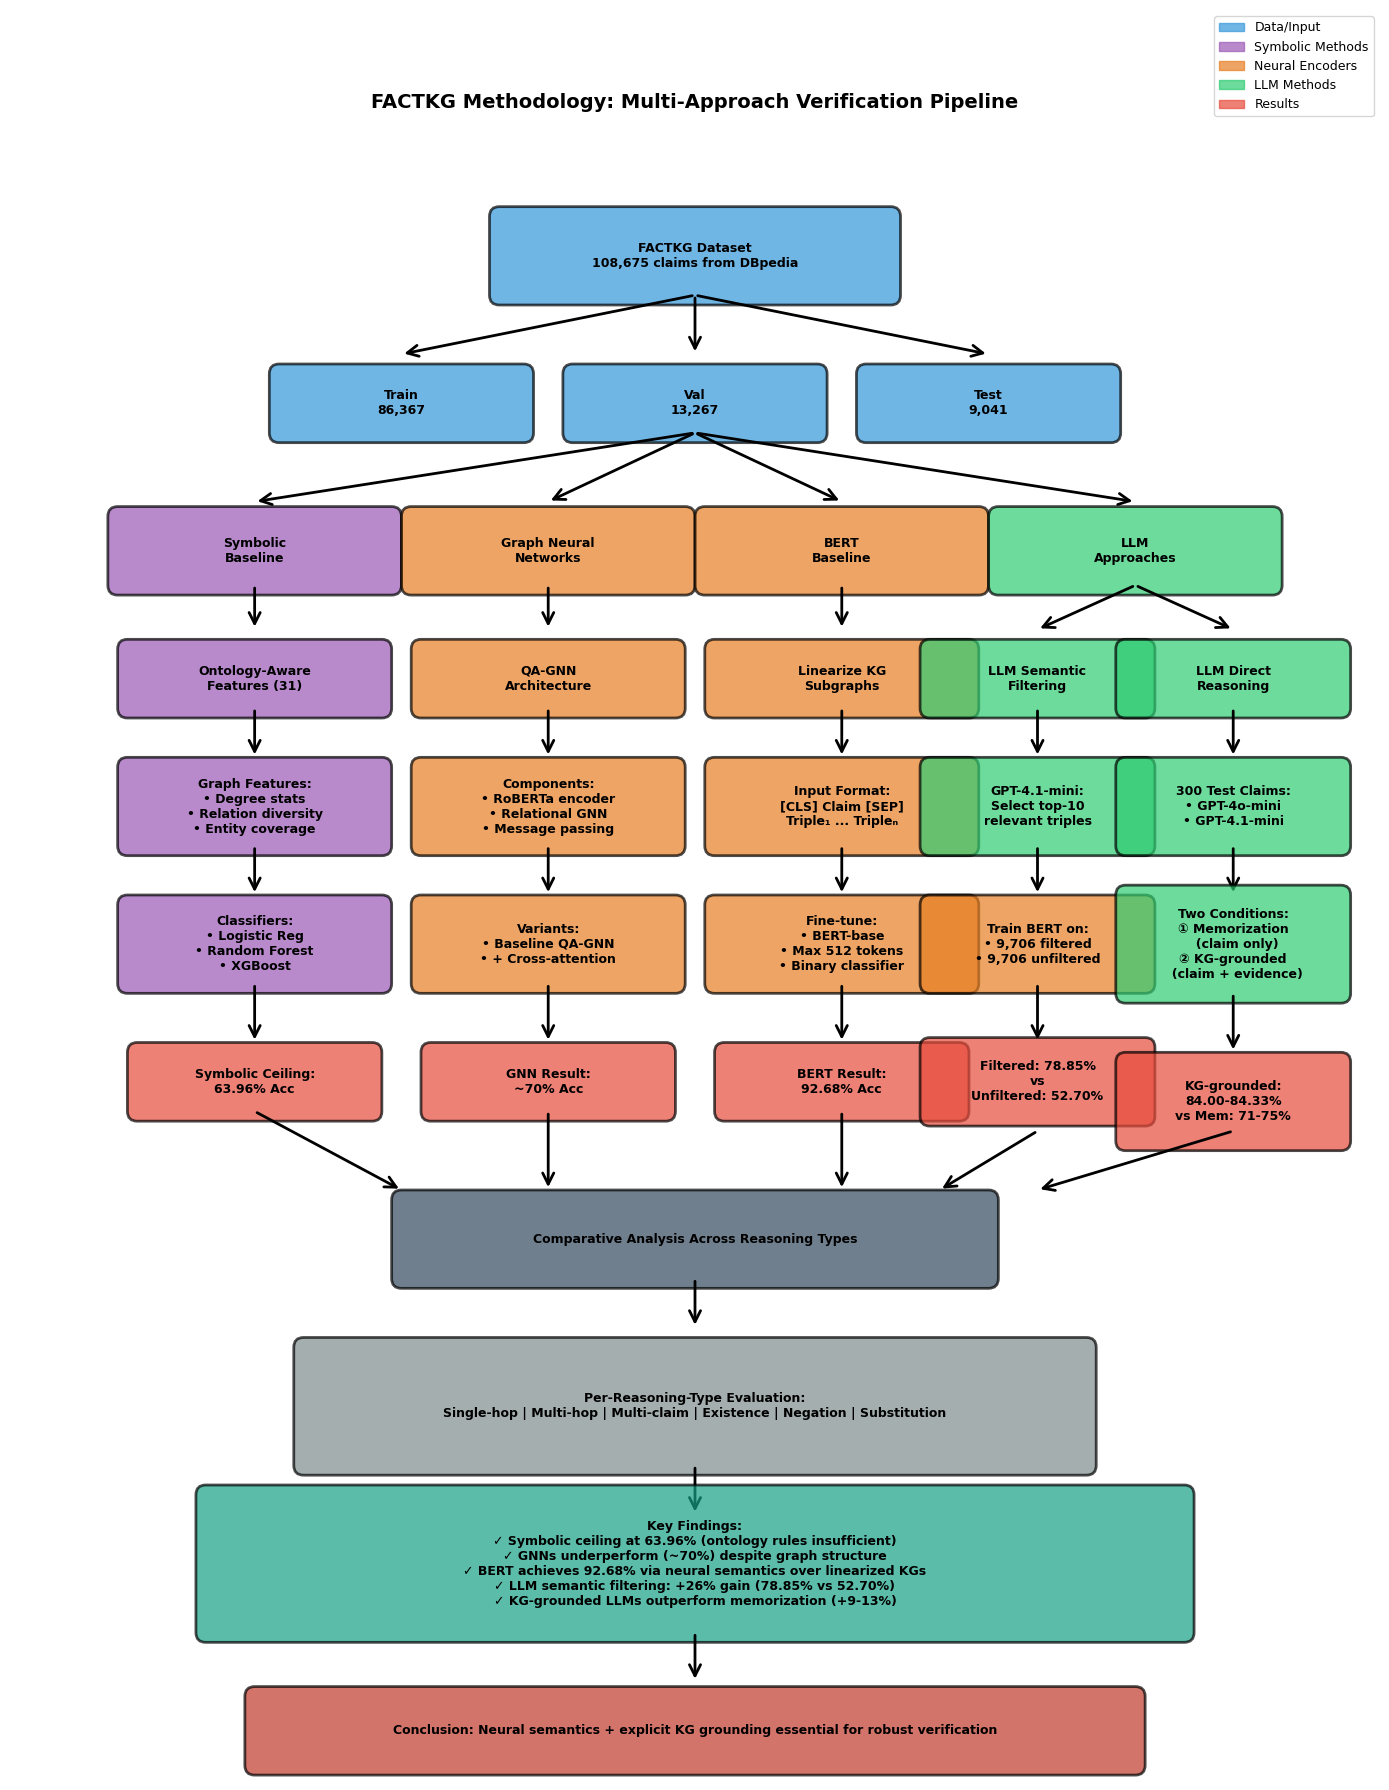

✓ Methodology flowchart saved as 'methodology_flowchart.pdf/png'


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
import numpy as np

def create_methodology_flowchart():
    """
    Creates a comprehensive methodology flowchart for the paper
    """
    fig, ax = plt.subplots(figsize=(14, 18))
    
    # Color scheme
    colors = {
        'data': '#3498db',      # Blue
        'symbolic': '#9b59b6',  # Purple
        'neural': '#e67e22',    # Orange
        'llm': '#2ecc71',       # Green
        'eval': '#e74c3c'       # Red
    }
    
    def add_box(x, y, w, h, text, color, style='round'):
        box = FancyBboxPatch((x-w/2, y-h/2), w, h,
                            boxstyle=f"{style},pad=0.1",
                            facecolor=color, edgecolor='black',
                            alpha=0.7, linewidth=2)
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=9, weight='bold', wrap=True)
    
    def add_arrow(x1, y1, x2, y2, label='', style='->', color='black'):
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                               arrowstyle=style, color=color,
                               linewidth=2, mutation_scale=20)
        ax.add_patch(arrow)
        if label:
            mid_x, mid_y = (x1+x2)/2, (y1+y2)/2
            ax.text(mid_x+0.3, mid_y, label, fontsize=7,
                   style='italic', bbox=dict(boxstyle='round',
                   facecolor='white', alpha=0.8))
    
    # Title
    ax.text(7, 17, 'FACTKG Methodology: Multi-Approach Verification Pipeline',
           ha='center', fontsize=14, weight='bold')
    
    # 1. Data Source
    add_box(7, 15.5, 4, 0.8, 'FACTKG Dataset\n108,675 claims from DBpedia',
           colors['data'], 'round')
    
    # 2. Data splits
    add_arrow(7, 15.1, 4, 14.5)
    add_arrow(7, 15.1, 7, 14.5)
    add_arrow(7, 15.1, 10, 14.5)
    
    add_box(4, 14, 2.5, 0.6, 'Train\n86,367', colors['data'], 'round')
    add_box(7, 14, 2.5, 0.6, 'Val\n13,267', colors['data'], 'round')
    add_box(10, 14, 2.5, 0.6, 'Test\n9,041', colors['data'], 'round')
    
    # Branch into 4 approaches
    add_arrow(7, 13.7, 2.5, 13)
    add_arrow(7, 13.7, 5.5, 13)
    add_arrow(7, 13.7, 8.5, 13)
    add_arrow(7, 13.7, 11.5, 13)
    
    # === BRANCH 1: Symbolic ===
    y_sym = 12.5
    add_box(2.5, y_sym, 2.8, 0.7, 'Symbolic\nBaseline',
           colors['symbolic'], 'round')
    
    add_arrow(2.5, y_sym-0.35, 2.5, y_sym-0.8)
    add_box(2.5, y_sym-1.3, 2.6, 0.6, 'Ontology-Aware\nFeatures (31)',
           colors['symbolic'], 'round')
    
    add_arrow(2.5, y_sym-1.6, 2.5, y_sym-2.1)
    add_box(2.5, y_sym-2.6, 2.6, 0.8, 'Graph Features:\n• Degree stats\n• Relation diversity\n• Entity coverage',
           colors['symbolic'], 'round')
    
    add_arrow(2.5, y_sym-3.0, 2.5, y_sym-3.5)
    add_box(2.5, y_sym-4.0, 2.6, 0.8, 'Classifiers:\n• Logistic Reg\n• Random Forest\n• XGBoost',
           colors['symbolic'], 'round')
    
    add_arrow(2.5, y_sym-4.4, 2.5, y_sym-5.0)
    add_box(2.5, y_sym-5.4, 2.4, 0.6, 'Symbolic Ceiling:\n63.96% Acc',
           colors['eval'], 'round')
    
    # === BRANCH 2: GNN ===
    y_gnn = 12.5
    add_box(5.5, y_gnn, 2.8, 0.7, 'Graph Neural\nNetworks',
           colors['neural'], 'round')
    
    add_arrow(5.5, y_gnn-0.35, 5.5, y_gnn-0.8)
    add_box(5.5, y_gnn-1.3, 2.6, 0.6, 'QA-GNN\nArchitecture',
           colors['neural'], 'round')
    
    add_arrow(5.5, y_gnn-1.6, 5.5, y_gnn-2.1)
    add_box(5.5, y_gnn-2.6, 2.6, 0.8, 'Components:\n• RoBERTa encoder\n• Relational GNN\n• Message passing',
           colors['neural'], 'round')
    
    add_arrow(5.5, y_gnn-3.0, 5.5, y_gnn-3.5)
    add_box(5.5, y_gnn-4.0, 2.6, 0.8, 'Variants:\n• Baseline QA-GNN\n• + Cross-attention',
           colors['neural'], 'round')
    
    add_arrow(5.5, y_gnn-4.4, 5.5, y_gnn-5.0)
    add_box(5.5, y_gnn-5.4, 2.4, 0.6, 'GNN Result:\n~70% Acc',
           colors['eval'], 'round')
    
    # === BRANCH 3: BERT ===
    y_bert = 12.5
    add_box(8.5, y_bert, 2.8, 0.7, 'BERT\nBaseline',
           colors['neural'], 'round')
    
    add_arrow(8.5, y_bert-0.35, 8.5, y_bert-0.8)
    add_box(8.5, y_bert-1.3, 2.6, 0.6, 'Linearize KG\nSubgraphs',
           colors['neural'], 'round')
    
    add_arrow(8.5, y_bert-1.6, 8.5, y_bert-2.1)
    add_box(8.5, y_bert-2.6, 2.6, 0.8, 'Input Format:\n[CLS] Claim [SEP]\nTriple₁ ... Tripleₙ',
           colors['neural'], 'round')
    
    add_arrow(8.5, y_bert-3.0, 8.5, y_bert-3.5)
    add_box(8.5, y_bert-4.0, 2.6, 0.8, 'Fine-tune:\n• BERT-base\n• Max 512 tokens\n• Binary classifier',
           colors['neural'], 'round')
    
    add_arrow(8.5, y_bert-4.4, 8.5, y_bert-5.0)
    add_box(8.5, y_bert-5.4, 2.4, 0.6, 'BERT Result:\n92.68% Acc',
           colors['eval'], 'round')
    
    # === BRANCH 4: LLM ===
    y_llm = 12.5
    add_box(11.5, y_llm, 2.8, 0.7, 'LLM\nApproaches',
           colors['llm'], 'round')
    
    # LLM splits into two sub-branches
    add_arrow(11.5, y_llm-0.35, 10.5, y_llm-0.8)
    add_arrow(11.5, y_llm-0.35, 12.5, y_llm-0.8)
    
    # Sub-branch 4a: Filtering
    add_box(10.5, y_llm-1.3, 2.2, 0.6, 'LLM Semantic\nFiltering',
           colors['llm'], 'round')
    
    add_arrow(10.5, y_llm-1.6, 10.5, y_llm-2.1)
    add_box(10.5, y_llm-2.6, 2.2, 0.8, 'GPT-4.1-mini:\nSelect top-10\nrelevant triples',
           colors['llm'], 'round')
    
    add_arrow(10.5, y_llm-3.0, 10.5, y_llm-3.5)
    add_box(10.5, y_llm-4.0, 2.2, 0.8, 'Train BERT on:\n• 9,706 filtered\n• 9,706 unfiltered',
           colors['neural'], 'round')
    
    add_arrow(10.5, y_llm-4.4, 10.5, y_llm-5.0)
    add_box(10.5, y_llm-5.4, 2.2, 0.7, 'Filtered: 78.85%\nvs\nUnfiltered: 52.70%',
           colors['eval'], 'round')
    
    # Sub-branch 4b: Direct LLM
    add_box(12.5, y_llm-1.3, 2.2, 0.6, 'LLM Direct\nReasoning',
           colors['llm'], 'round')
    
    add_arrow(12.5, y_llm-1.6, 12.5, y_llm-2.1)
    add_box(12.5, y_llm-2.6, 2.2, 0.8, '300 Test Claims:\n• GPT-4o-mini\n• GPT-4.1-mini',
           colors['llm'], 'round')
    
    add_arrow(12.5, y_llm-3.0, 12.5, y_llm-3.5)
    add_box(12.5, y_llm-4.0, 2.2, 1.0, 'Two Conditions:\n① Memorization\n  (claim only)\n② KG-grounded\n  (claim + evidence)',
           colors['llm'], 'round')
    
    add_arrow(12.5, y_llm-4.5, 12.5, y_llm-5.1)
    add_box(12.5, y_llm-5.6, 2.2, 0.8, 'KG-grounded:\n84.00-84.33%\nvs Mem: 71-75%',
           colors['eval'], 'round')
    
    # Convergence to analysis
    y_analysis = 5.5
    add_arrow(2.5, y_sym-5.7, 4, y_analysis+0.5)
    add_arrow(5.5, y_gnn-5.7, 5.5, y_analysis+0.5)
    add_arrow(8.5, y_bert-5.7, 8.5, y_analysis+0.5)
    add_arrow(10.5, y_llm-5.9, 9.5, y_analysis+0.5)
    add_arrow(12.5, y_llm-5.9, 10.5, y_analysis+0.5)
    
    add_box(7, y_analysis, 6, 0.8, 'Comparative Analysis Across Reasoning Types',
           '#34495e', 'round')
    
    add_arrow(7, y_analysis-0.4, 7, y_analysis-0.9)
    
    # Reasoning type breakdown
    y_reason = 3.8
    add_box(7, y_reason, 8, 1.2,
           'Per-Reasoning-Type Evaluation:\nSingle-hop | Multi-hop | Multi-claim | Existence | Negation | Substitution',
           '#7f8c8d', 'round')
    
    add_arrow(7, y_reason-0.6, 7, y_reason-1.1)
    
    # Key findings
    y_findings = 2.2
    add_box(7, y_findings, 10, 1.4,
           'Key Findings:\n' + 
           '✓ Symbolic ceiling at 63.96% (ontology rules insufficient)\n' +
           '✓ GNNs underperform (~70%) despite graph structure\n' +
           '✓ BERT achieves 92.68% via neural semantics over linearized KGs\n' +
           '✓ LLM semantic filtering: +26% gain (78.85% vs 52.70%)\n' +
           '✓ KG-grounded LLMs outperform memorization (+9-13%)',
           '#16a085', 'round')
    
    add_arrow(7, y_findings-0.7, 7, y_findings-1.2)
    
    # Conclusion
    add_box(7, 0.5, 9, 0.7,
           'Conclusion: Neural semantics + explicit KG grounding essential for robust verification',
           '#c0392b', 'round')
    
    # Add legend
    legend_elements = [
        mpatches.Patch(color=colors['data'], label='Data/Input', alpha=0.7),
        mpatches.Patch(color=colors['symbolic'], label='Symbolic Methods', alpha=0.7),
        mpatches.Patch(color=colors['neural'], label='Neural Encoders', alpha=0.7),
        mpatches.Patch(color=colors['llm'], label='LLM Methods', alpha=0.7),
        mpatches.Patch(color=colors['eval'], label='Results', alpha=0.7),
    ]
    ax.legend(handles=legend_elements, loc='upper right',
             fontsize=9, frameon=True, fancybox=True)
    
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 18)
    ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('methodology_flowchart.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('methodology_flowchart.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Methodology flowchart saved as 'methodology_flowchart.pdf/png'")

# Run it
create_methodology_flowchart()

Loading data...
Loaded 9041 claims and 9041 subgraphs

Selecting examples...
  ✓ Found existence example: I have heard that Mobyland had a successor....
  ✓ Found substitution example: The successor to Gaston Flosse was called Nuihau Laurey....
  ✓ Found multi claim example: Agra airport is in Nanticoke River with the ATA location ide...
  ✓ Found multi hop example: Agra Airport is also located in a country where the leader i...
  ✓ Found negation example: I understand that Acura is not a division of Honda....

Selected 5 examples

Creating visualizations...
  Visualizing example 1: existence
  Visualizing example 2: substitution
  Visualizing example 3: multi claim
  Visualizing example 4: multi hop
  Visualizing example 5: negation


/tmp/slurmtmp.42162613/ipykernel_247374/3019055474.py:314: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/3019055474.py:314: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/3019055474.py:314: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/3019055474.py:314: UserWarning: Glyph 30740 (\N{CJK UNIFIED IDEOGRAPH-7814}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/3019055474.py:314: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5})


✅ Saved: kg_examples_factkg.png and kg_examples_factkg.pdf


/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30740 (\N{CJK UNIFIED IDEOGRAPH-7814}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

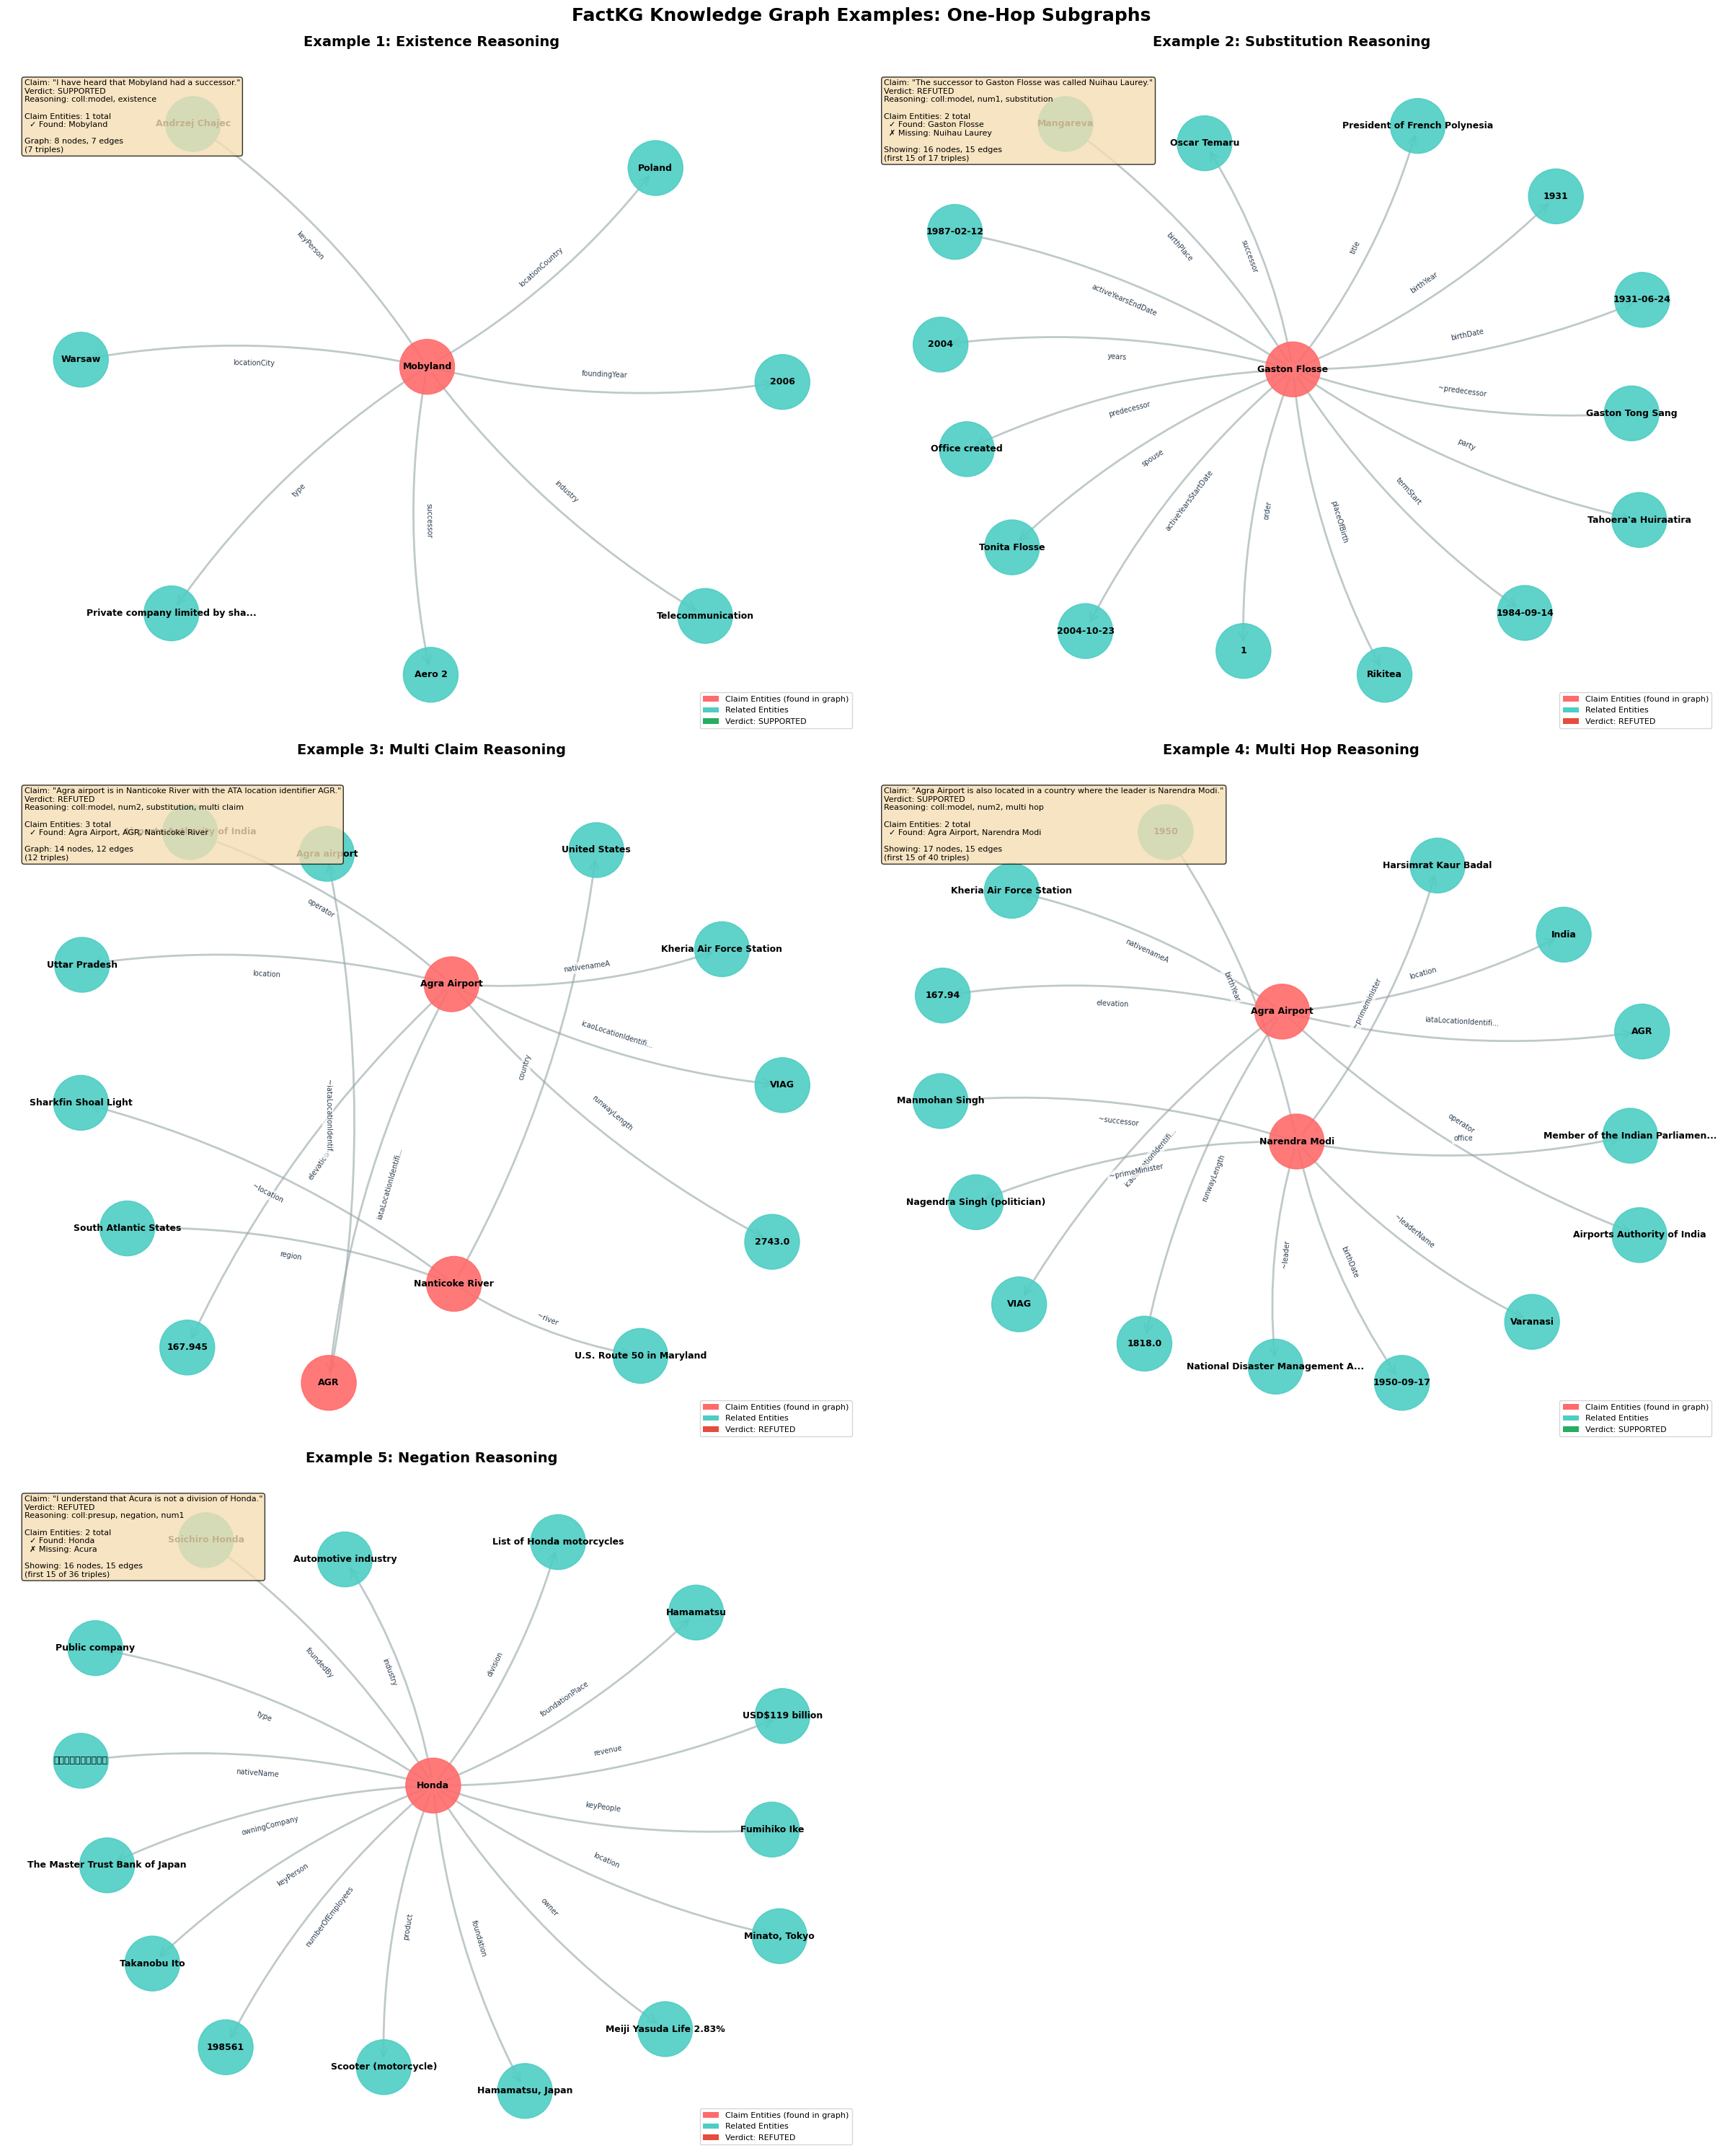


EXAMPLE DETAILS (matches visualization)

Example 1: EXISTENCE REASONING
Claim:
  "I have heard that Mobyland had a successor."

Verdict: SUPPORTED

Reasoning Types: coll:model, existence

Claim Entities (from Entity_set in data):
  Total in claim: Mobyland (1 entities)
  ✓ Found in graph: Mobyland (1 entities)

Graph Statistics:
  Graph: 8 nodes, 7 edges
         (7 triples)

Sample Evidence (first 5 triples):
  [1] Mobyland --foundingYear--> 2006
  [2] Mobyland --type--> Private company limited by shares
  [3] Mobyland --locationCity--> Warsaw
  [4] Mobyland --locationCountry--> Poland
  [5] Mobyland --keyPerson--> Andrzej Chajec
  ... and 2 more triples

Example 2: SUBSTITUTION REASONING
Claim:
  "The successor to Gaston Flosse was called Nuihau Laurey."

Verdict: REFUTED

Reasoning Types: coll:model, num1, substitution

Claim Entities (from Entity_set in data):
  Total in claim: Gaston Flosse, Nuihau Laurey (2 entities)
  ✓ Found in graph: Gaston Flosse (1 entities)
  ✗ Missing fro

In [6]:
"""
Create Publication-Quality KG Visualizations from FactKG Data
FIXED: 
1. Proper graph terminology (nodes/edges not entities/relations)
2. Show which claim entities were found vs missing
3. Display entity matching details in graph
"""

import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path

# Set paths
DATA_DIR = Path("data")
CLAIMS_PATH = DATA_DIR / "factkg/factkg_test.pickle"
SUBGRAPHS_PATH = DATA_DIR / "subgraphs/subgraphs_one_hop_test.pkl"

# Load data
print("Loading data...")
with open(CLAIMS_PATH, 'rb') as f:
    claims_dict = pickle.load(f)

subgraphs_df = pd.read_pickle(SUBGRAPHS_PATH)
print(f"Loaded {len(claims_dict)} claims and {len(subgraphs_df)} subgraphs")

# Helper functions
def clean_text(text):
    """Clean entity/relation text for display."""
    if '/' in text:
        text = text.split('/')[-1]
    text = text.replace('_', ' ')
    return text.strip('"\'')  # Remove quotes too

def entity_matches_node(entity, node):
    """Check if entity matches node with stricter rules."""
    entity_clean = clean_text(str(entity))
    node_clean = node
    
    # Exact match (case-insensitive)
    if entity_clean.lower() == node_clean.lower():
        return True
    
    # Exact match after removing spaces/underscores
    entity_normalized = entity_clean.lower().replace(' ', '').replace('_', '')
    node_normalized = node_clean.lower().replace(' ', '').replace('_', '')
    if entity_normalized == node_normalized:
        return True
    
    # Only allow substring match if entity is reasonably long (>= 5 chars)
    # This prevents "AGR" from matching "Agra Airport"
    if len(entity_clean) >= 5:
        if (entity_clean.lower() in node_clean.lower() or 
            node_clean.lower() in entity_clean.lower()):
            return True
    
    return False

def create_graph_from_triples(triples, max_triples=15):
    """Create NetworkX graph from triples."""
    G = nx.DiGraph()
    
    # Limit to most relevant triples for visualization clarity
    triples_to_show = triples[:max_triples]
    
    for s, p, o in triples_to_show:
        s_clean = clean_text(str(s))
        p_clean = clean_text(str(p))
        o_clean = clean_text(str(o))
        
        G.add_edge(s_clean, o_clean, label=p_clean)
    
    return G

def visualize_kg_example(claim, label, triples, reasoning_types, 
                         claim_entities=None, title=None, ax=None,
                         max_triples=15):
    """Create a beautiful KG visualization with consistent labeling."""
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 10))
    
    # Track totals
    total_triples = len(triples)
    
    # Create graph (limit for visualization clarity)
    G = create_graph_from_triples(triples, max_triples=max_triples)
    
    if len(G.nodes()) == 0:
        ax.text(0.5, 0.5, "No triples to visualize", 
                ha='center', va='center', fontsize=16)
        return {'num_nodes': 0, 'num_edges': 0, 
                'total_triples': total_triples, 'matched_entities': [],
                'missing_entities': []}
    
    # Layout
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    # Identify claim entity nodes (using ACTUAL Entity_set from data)
    claim_entity_nodes = []
    matched_entities = []
    missing_entities = []
    
    if claim_entities:
        for entity in claim_entities:
            entity_clean = clean_text(str(entity))
            found = False
            
            for node in G.nodes():
                if entity_matches_node(entity, node):
                    if node not in claim_entity_nodes:
                        claim_entity_nodes.append(node)
                        matched_entities.append(entity_clean)
                        found = True
                        break
            
            if not found:
                missing_entities.append(entity_clean)
    
    # Color nodes
    node_colors = []
    for node in G.nodes():
        if node in claim_entity_nodes:
            node_colors.append('#FF6B6B')  # Red for claim entities
        else:
            node_colors.append('#4ECDC4')  # Teal for other entities
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          node_color=node_colors,
                          node_size=3000,
                          alpha=0.9,
                          ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos,
                          edge_color='#95A5A6',
                          width=2,
                          alpha=0.6,
                          arrows=True,
                          arrowsize=20,
                          arrowstyle='->',
                          connectionstyle='arc3,rad=0.1',
                          ax=ax)
    
    # Draw node labels
    node_labels = {node: node[:30] + '...' if len(node) > 30 else node 
                   for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, node_labels,
                           font_size=9,
                           font_weight='bold',
                           ax=ax)
    
    # Draw edge labels (relations)
    edge_labels = nx.get_edge_attributes(G, 'label')
    edge_labels = {k: v[:20] + '...' if len(v) > 20 else v 
                   for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels,
                                font_size=7,
                                font_color='#2C3E50',
                                bbox=dict(boxstyle='round,pad=0.3', 
                                         facecolor='white', 
                                         edgecolor='none',
                                         alpha=0.7),
                                ax=ax)
    
    # Title and claim
    verdict_color = '#27AE60' if label else '#E74C3C'
    verdict_text = 'SUPPORTED' if label else 'REFUTED'
    
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Add claim text and metadata
    claim_text = claim[:80] + '...' if len(claim) > 80 else claim
    info_text = f'Claim: "{claim_text}"\n'
    info_text += f'Verdict: {verdict_text}\n'
    info_text += f'Reasoning: {", ".join(reasoning_types)}\n'
    
    # Show entity matching
    if claim_entities:
        info_text += f'\nClaim Entities: {len(claim_entities)} total\n'
        if matched_entities:
            info_text += f'  ✓ Found: {", ".join(matched_entities)}\n'
        if missing_entities:
            info_text += f'  ✗ Missing: {", ".join(missing_entities)}\n'
    
    # PROPER TERMINOLOGY: nodes and edges, not entities/relations
    num_nodes = len(G.nodes())
    num_edges = len(G.edges())
    
    if total_triples > max_triples:
        info_text += f'\nShowing: {num_nodes} nodes, {num_edges} edges\n'
        info_text += f'(first {max_triples} of {total_triples} triples)'
    else:
        info_text += f'\nGraph: {num_nodes} nodes, {num_edges} edges\n'
        info_text += f'({total_triples} triples)'
    
    ax.text(0.02, 0.98, info_text,
           transform=ax.transAxes,
           fontsize=8,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#FF6B6B', label='Claim Entities (found in graph)'),
        Patch(facecolor='#4ECDC4', label='Related Entities'),
        Patch(facecolor=verdict_color, label=f'Verdict: {verdict_text}')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=8)
    
    ax.axis('off')
    plt.tight_layout()
    
    # Return stats for consistent printing
    return {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'total_triples': total_triples,
        'matched_entities': matched_entities,
        'missing_entities': missing_entities
    }

# Select 5 diverse examples (one per reasoning type)
print("\nSelecting examples...")

examples = []
claims_items = list(claims_dict.items())

# Target reasoning types
target_types = ['existence', 'negation', 'multi hop', 'substitution', 'multi claim']
found_types = set()

for idx, (claim_text, claim_meta) in enumerate(claims_items):
    if idx >= len(subgraphs_df):
        continue
    
    if len(examples) >= 5:
        break
    
    reasoning_types = claim_meta.get('types', [])
    
    # Find one example per reasoning type
    for target_type in target_types:
        if target_type in reasoning_types and target_type not in found_types:
            
            subgraph_row = subgraphs_df.iloc[idx]
            walked_dict = subgraph_row['walked']
            
            triples = []
            if isinstance(walked_dict, dict):
                triples = walked_dict.get('walkable', []) + walked_dict.get('connected', [])
            
            if len(triples) >= 5:  # Need enough triples to visualize
                # Normalize label
                label = claim_meta['Label']
                if isinstance(label, (list, tuple)):
                    label = label[0]
                label = bool(label)
                
                # USE ACTUAL Entity_set FROM DATA!
                claim_entities = claim_meta.get('Entity_set', [])
                
                examples.append({
                    'claim': claim_text,
                    'label': label,
                    'types': reasoning_types,
                    'triples': triples,
                    'entities': claim_entities,
                    'primary_type': target_type
                })
                
                found_types.add(target_type)
                print(f"  ✓ Found {target_type} example: {claim_text[:60]}...")
                break

print(f"\nSelected {len(examples)} examples")

# Create visualizations
print("\nCreating visualizations...")

fig, axes = plt.subplots(3, 2, figsize=(24, 30))
axes = axes.flatten()

# Store stats for consistent output
example_stats = []

for idx, example in enumerate(examples):
    print(f"  Visualizing example {idx+1}: {example['primary_type']}")
    
    stats = visualize_kg_example(
        claim=example['claim'],
        label=example['label'],
        triples=example['triples'],
        reasoning_types=example['types'],
        claim_entities=example['entities'],
        title=f"Example {idx+1}: {example['primary_type'].title()} Reasoning",
        ax=axes[idx],
        max_triples=15
    )
    
    example_stats.append(stats)

# Remove extra subplot
axes[-1].axis('off')

plt.suptitle('FactKG Knowledge Graph Examples: One-Hop Subgraphs', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('kg_examples_factkg.png', dpi=300, bbox_inches='tight')
plt.savefig('kg_examples_factkg.pdf', bbox_inches='tight')
print("\n✅ Saved: kg_examples_factkg.png and kg_examples_factkg.pdf")

plt.show()

# Print example details (CONSISTENT WITH VISUALIZATION)
print("\n" + "="*80)
print("EXAMPLE DETAILS (matches visualization)")
print("="*80)

for idx, (example, stats) in enumerate(zip(examples, example_stats), 1):
    print(f"\n{'='*80}")
    print(f"Example {idx}: {example['primary_type'].upper()} REASONING")
    print(f"{'='*80}")
    print(f"Claim:")
    print(f"  \"{example['claim']}\"")
    print(f"\nVerdict: {'SUPPORTED' if example['label'] else 'REFUTED'}")
    print(f"\nReasoning Types: {', '.join(example['types'])}")
    
    # Show entity matching details
    print(f"\nClaim Entities (from Entity_set in data):")
    entity_list = [clean_text(str(e)) for e in example['entities']]
    print(f"  Total in claim: {', '.join(entity_list)} ({len(entity_list)} entities)")
    
    if stats['matched_entities']:
        print(f"  ✓ Found in graph: {', '.join(stats['matched_entities'])} ({len(stats['matched_entities'])} entities)")
    
    if stats['missing_entities']:
        print(f"  ✗ Missing from graph: {', '.join(stats['missing_entities'])} ({len(stats['missing_entities'])} entities)")
        if not example['label']:
            print(f"      → Missing entities explain why claim is REFUTED")
    
    print(f"\nGraph Statistics:")
    if stats['total_triples'] > 15:
        print(f"  Visualization: {stats['num_nodes']} nodes, {stats['num_edges']} edges")
        print(f"                 (showing first 15 of {stats['total_triples']} triples)")
    else:
        print(f"  Graph: {stats['num_nodes']} nodes, {stats['num_edges']} edges")
        print(f"         ({stats['total_triples']} triples)")
    
    print(f"\nSample Evidence (first 5 triples):")
    for i, (s, p, o) in enumerate(example['triples'][:5], 1):
        s_clean = clean_text(str(s))
        p_clean = clean_text(str(p))
        o_clean = clean_text(str(o))
        print(f"  [{i}] {s_clean} --{p_clean}--> {o_clean}")
    
    if len(example['triples']) > 5:
        print(f"  ... and {len(example['triples']) - 5} more triples")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Total examples visualized: {len(examples)}")
print(f"Reasoning types covered: {', '.join([e['primary_type'] for e in examples])}")
print(f"\nColor coding:")
print(f"  🔴 Red nodes = Claim entities found in graph (from Entity_set)")
print(f"  🔵 Teal nodes = Other related entities from knowledge graph")
print(f"\nTerminology:")
print(f"  • Nodes = Graph vertices (entities/literals)")
print(f"  • Edges = Graph connections (relations/predicates)")
print(f"  • Triples = (subject, predicate, object) statements")
print(f"\nNote: Visualizations limited to 15 triples for clarity.")
print(f"      Full subgraphs may contain more triples.")
print("="*80)


In [8]:
"""
Search for the NEGATION example specifically
"""

import pickle
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")
CLAIMS_PATH = DATA_DIR / "factkg/factkg_test.pickle"
SUBGRAPHS_PATH = DATA_DIR / "subgraphs/subgraphs_one_hop_test.pkl"

# Load data
with open(CLAIMS_PATH, 'rb') as f:
    claims_dict = pickle.load(f)

subgraphs_df = pd.read_pickle(SUBGRAPHS_PATH)

def clean_text(text):
    """Clean entity/relation text for display."""
    if '/' in text:
        text = text.split('/')[-1]
    return text.replace('_', ' ').strip('"\'')

# Find the Acura/Honda NEGATION example
print("Searching for Acura negation example...")
print("=" * 80)

claims_items = list(claims_dict.items())

for idx, (claim_text, claim_meta) in enumerate(claims_items):
    if idx >= len(subgraphs_df):
        continue
    
    reasoning_types = claim_meta.get('types', [])
    
    # Look for Acura + negation reasoning
    if ('Acura' in claim_text and 
        'Honda' in claim_text and
        'negation' in reasoning_types and
        'not' in claim_text.lower()):
        
        print(f"\nFOUND IT! Index: {idx}")
        print(f"Claim: {claim_text}")
        print(f"Label: {claim_meta['Label']}")
        print(f"Entity_set: {claim_meta.get('Entity_set', [])}")
        print(f"Types: {reasoning_types}")
        
        # Get subgraph
        subgraph_row = subgraphs_df.iloc[idx]
        walked_dict = subgraph_row['walked']
        
        triples = []
        if isinstance(walked_dict, dict):
            triples = walked_dict.get('walkable', []) + walked_dict.get('connected', [])
        
        print(f"\nTotal triples: {len(triples)}")
        print("\n" + "=" * 80)
        print("ALL TRIPLES:")
        print("=" * 80)
        
        # Print ALL triples
        acura_found = False
        division_triples = []
        
        for i, (s, p, o) in enumerate(triples, 1):
            s_clean = clean_text(str(s))
            p_clean = clean_text(str(p))
            o_clean = clean_text(str(o))
            
            # Check if Acura appears
            is_acura = 'acura' in s_clean.lower() or 'acura' in o_clean.lower()
            is_division = 'division' in p_clean.lower() or 'division' in s_clean.lower() or 'division' in o_clean.lower()
            
            if is_acura:
                acura_found = True
                print(f"[{i}] *** {s_clean} --{p_clean}--> {o_clean} *** (ACURA)")
            elif is_division:
                division_triples.append((i, s_clean, p_clean, o_clean))
                print(f"[{i}] >>> {s_clean} --{p_clean}--> {o_clean} <<< (DIVISION)")
            else:
                print(f"[{i}] {s_clean} --{p_clean}--> {o_clean}")
        
        print("\n" + "=" * 80)
        print("ANALYSIS:")
        print("=" * 80)
        
        if acura_found:
            print("✓ Acura WAS found in the triples!")
        else:
            print("✗ Acura was NOT found in ANY triple")
        
        if division_triples:
            print(f"\n✓ Found {len(division_triples)} triples with 'division':")
            for i, s, p, o in division_triples:
                print(f"  [{i}] {s} --{p}--> {o}")
        else:
            print("\n✗ No 'division' relation found")
        
        # Check specifically for Honda -> division -> Acura
        print("\nLooking for Honda --division--> Acura or similar:")
        for i, (s, p, o) in enumerate(triples, 1):
            s_clean = clean_text(str(s))
            p_clean = clean_text(str(p))
            o_clean = clean_text(str(o))
            
            if ('honda' in s_clean.lower() and 'acura' in o_clean.lower()) or \
               ('acura' in s_clean.lower() and 'honda' in o_clean.lower()):
                print(f"  [{i}] {s_clean} --{p_clean}--> {o_clean}")
        
        break
else:
    print("\n✗ Could not find the negation example with Acura and Honda")
    print("\nLet me search more broadly for negation examples with Honda:")
    
    for idx, (claim_text, claim_meta) in enumerate(claims_items[:100]):
        reasoning_types = claim_meta.get('types', [])
        if 'Honda' in claim_text and 'negation' in reasoning_types:
            print(f"\n[{idx}] {claim_text}")
            print(f"    Entity_set: {claim_meta.get('Entity_set', [])}")
            print(f"    Label: {claim_meta['Label']}")


Searching for Acura negation example...

FOUND IT! Index: 7388
Claim: I understand that Acura is not a division of Honda.
Label: [False]
Entity_set: ['Honda', 'Acura']
Types: ['coll:presup', 'negation', 'num1']

Total triples: 36

ALL TRIPLES:
[1] Honda --revenue--> USD$119 billion
[2] Honda --numberOfEmployees--> 198561
[3] Honda --type--> Public company
[4] Honda --foundationPlace--> Hamamatsu
[5] Honda --foundedBy--> Soichiro Honda
[6] Honda --location--> Minato, Tokyo
[7] Honda --keyPerson--> Takanobu Ito
[8] Honda --industry--> Automotive industry
[9] Honda --product--> Scooter (motorcycle)
[10] Honda --owner--> Meiji Yasuda Life 2.83%
[11] Honda --owningCompany--> The Master Trust Bank of Japan
[12] >>> Honda --division--> List of Honda motorcycles <<< (DIVISION)
[13] Honda --nativeName--> 本田技研工業株式会社
[14] Honda --foundation--> Hamamatsu, Japan
[15] Honda --keyPeople--> Fumihiko Ike
[16] Honda --netIncome--> 5.75E9
[17] Honda --~owner--> Suzuka Circuit
[18] Honda --~owningCompany-

Loading data...
Loaded 9041 claims and 9041 subgraphs

Selecting examples with varying graph densities...

Searching for existence (5-12 triples)...
  ✓ Found: 7 triples - I have heard that Mobyland had a successor....

Searching for substitution (15-25 triples)...
  ✓ Found: 17 triples - The successor to Gaston Flosse was called Nuihau L...

Searching for multi claim (15-25 triples)...
  ✓ Found: 24 triples - Agra Airport, El Hatillo Municipality, Venezuela, ...

Searching for multi hop (30-45 triples)...
  ✓ Found: 40 triples - Agra Airport is also located in a country where th...

Searching for negation (30-45 triples)...
  ✓ Found: 36 triples - I understand that Acura is not a division of Honda...

Selected 5 examples
  1. existence      :  7 triples
  2. substitution   : 17 triples
  3. multi claim    : 24 triples
  4. multi hop      : 40 triples
  5. negation       : 36 triples

Creating visualizations (showing ALL triples)...
  Visualizing example 1: existence (7 triples)
  Visu

/tmp/slurmtmp.42162613/ipykernel_247374/1627232910.py:337: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg_full.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/1627232910.py:337: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg_full.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/1627232910.py:337: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg_full.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/1627232910.py:337: UserWarning: Glyph 30740 (\N{CJK UNIFIED IDEOGRAPH-7814}) missing from font(s) DejaVu Sans.
  plt.savefig('kg_examples_factkg_full.png', dpi=300, bbox_inches='tight')
/tmp/slurmtmp.42162613/ipykernel_247374/1627232910.py:337: UserWarning: Glyph 24037 (\N{CJK UNIF


✅ Saved: kg_examples_factkg_full.png and kg_examples_factkg_full.pdf


/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30740 (\N{CJK UNIFIED IDEOGRAPH-7814}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

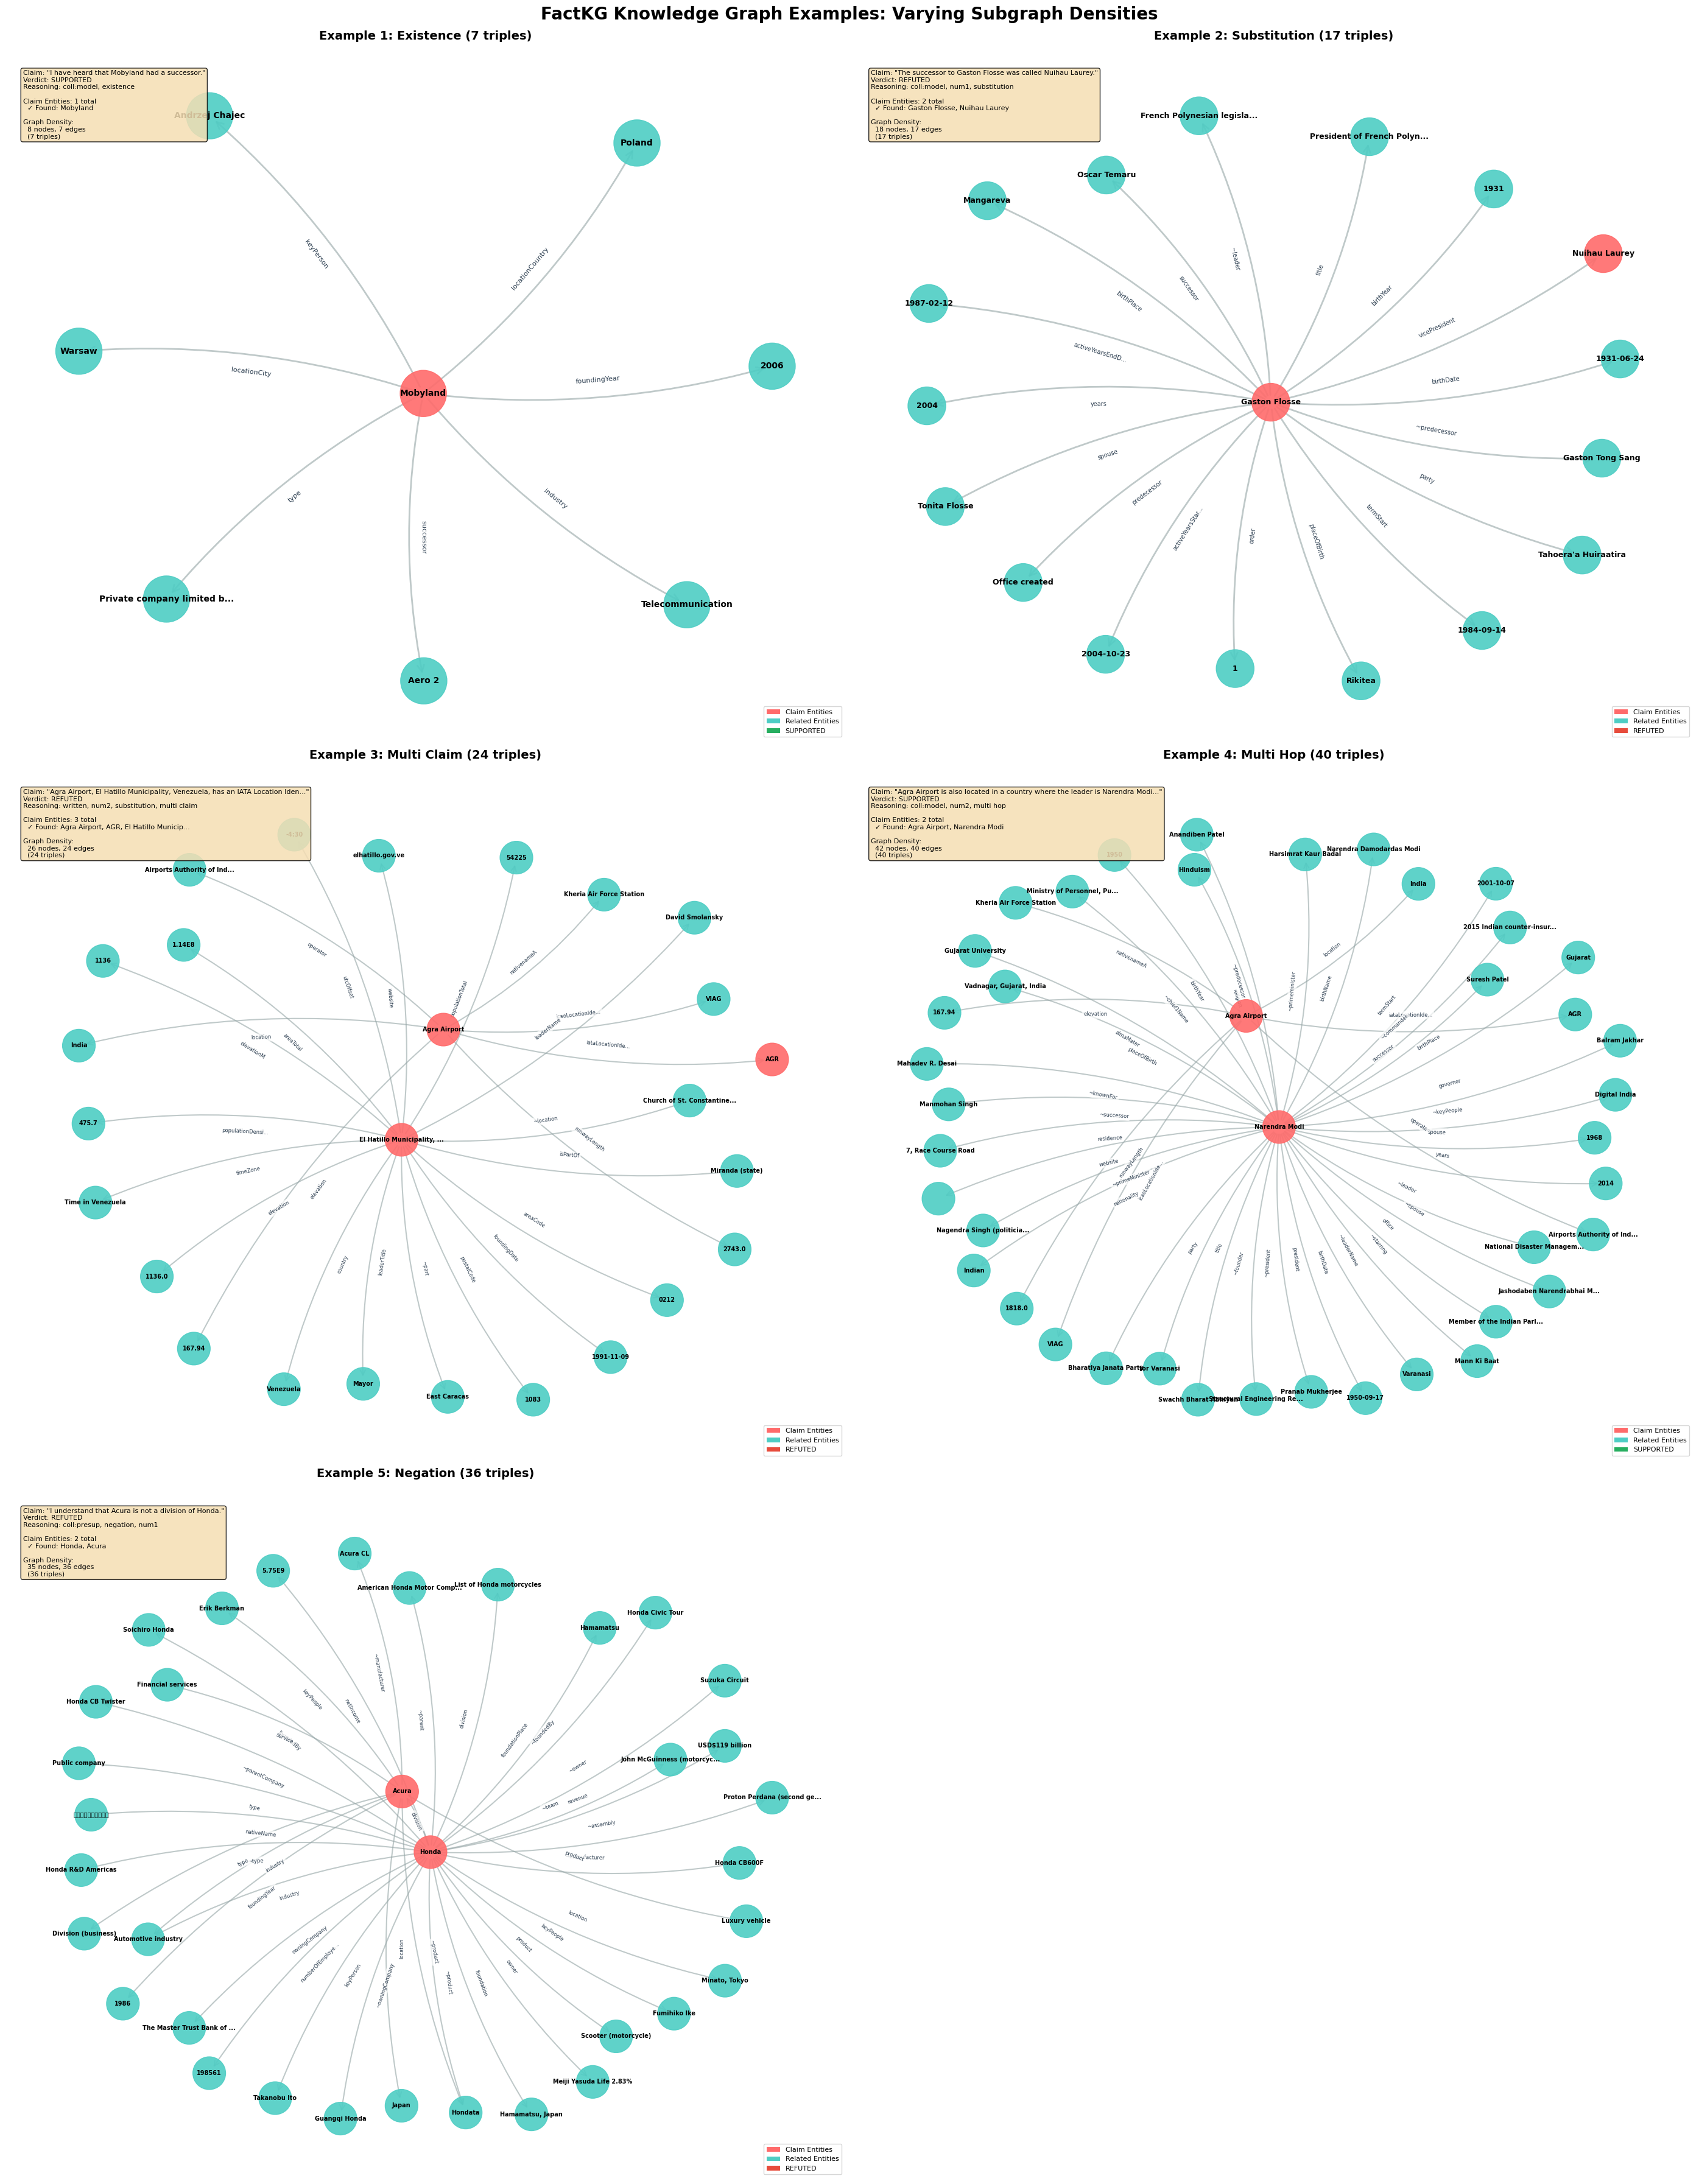


EXAMPLE DETAILS - FULL SUBGRAPHS

Example 1: EXISTENCE REASONING
Claim:
  "I have heard that Mobyland had a successor."

Verdict: SUPPORTED
Reasoning Types: coll:model, existence

Claim Entities:
  Total: Mobyland (1 entities)
  ✓ Found: Mobyland

Graph Density:
  Nodes: 8
  Edges: 7
  Triples: 7
  Avg edges/node: 0.88

All 7 Triples:
  [ 1] Mobyland --foundingYear--> 2006 ***
  [ 2] Mobyland --type--> Private company limited by shares ***
  [ 3] Mobyland --locationCity--> Warsaw ***
  [ 4] Mobyland --locationCountry--> Poland ***
  [ 5] Mobyland --keyPerson--> Andrzej Chajec ***
  [ 6] Mobyland --industry--> Telecommunication ***
  [ 7] Mobyland --successor--> Aero 2 ***

Example 2: SUBSTITUTION REASONING
Claim:
  "The successor to Gaston Flosse was called Nuihau Laurey."

Verdict: REFUTED
Reasoning Types: coll:model, num1, substitution

Claim Entities:
  Total: Gaston Flosse, Nuihau Laurey (2 entities)
  ✓ Found: Gaston Flosse, Nuihau Laurey

Graph Density:
  Nodes: 18
  Edges: 17
 

In [9]:
"""
Create Publication-Quality KG Visualizations from FactKG Data
Shows FULL subgraphs with varying densities to demonstrate real complexity
"""

import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path

# Set paths
DATA_DIR = Path("data")
CLAIMS_PATH = DATA_DIR / "factkg/factkg_test.pickle"
SUBGRAPHS_PATH = DATA_DIR / "subgraphs/subgraphs_one_hop_test.pkl"

# Load data
print("Loading data...")
with open(CLAIMS_PATH, 'rb') as f:
    claims_dict = pickle.load(f)

subgraphs_df = pd.read_pickle(SUBGRAPHS_PATH)
print(f"Loaded {len(claims_dict)} claims and {len(subgraphs_df)} subgraphs")

# Helper functions
def clean_text(text):
    """Clean entity/relation text for display."""
    if '/' in text:
        text = text.split('/')[-1]
    return text.replace('_', ' ').strip('"\'')

def entity_matches_node(entity, node):
    """Check if entity matches node with stricter rules."""
    entity_clean = clean_text(str(entity))
    node_clean = node
    
    # Exact match (case-insensitive)
    if entity_clean.lower() == node_clean.lower():
        return True
    
    # Exact match after removing spaces/underscores
    entity_normalized = entity_clean.lower().replace(' ', '').replace('_', '')
    node_normalized = node_clean.lower().replace(' ', '').replace('_', '')
    if entity_normalized == node_normalized:
        return True
    
    # Only allow substring match if entity is reasonably long (>= 5 chars)
    if len(entity_clean) >= 5:
        if (entity_clean.lower() in node_clean.lower() or 
            node_clean.lower() in entity_clean.lower()):
            return True
    
    return False

def create_graph_from_triples(triples, claim_entities=None):
    """Create NetworkX graph from ALL triples (no limit)."""
    G = nx.DiGraph()
    
    for s, p, o in triples:
        s_clean = clean_text(str(s))
        p_clean = clean_text(str(p))
        o_clean = clean_text(str(o))
        
        G.add_edge(s_clean, o_clean, label=p_clean)
    
    return G

def get_layout_params(num_nodes):
    """Get layout parameters based on graph size."""
    if num_nodes < 10:
        return {'k': 3, 'iterations': 100}  # Spread out small graphs
    elif num_nodes < 20:
        return {'k': 2, 'iterations': 75}
    else:
        return {'k': 1.5, 'iterations': 50}  # Compact large graphs

def get_font_sizes(num_nodes):
    """Get font sizes based on graph size."""
    if num_nodes < 10:
        return {'node_label': 10, 'edge_label': 8}
    elif num_nodes < 20:
        return {'node_label': 9, 'edge_label': 7}
    else:
        return {'node_label': 7, 'edge_label': 6}

def visualize_kg_example(claim, label, triples, reasoning_types, 
                         claim_entities=None, title=None, ax=None):
    """Create a beautiful KG visualization showing ALL triples."""
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 12))
    
    total_triples = len(triples)
    
    # Create graph from ALL triples (no limit)
    G = create_graph_from_triples(triples, claim_entities)
    
    if len(G.nodes()) == 0:
        ax.text(0.5, 0.5, "No triples to visualize", 
                ha='center', va='center', fontsize=16)
        return {'num_nodes': 0, 'num_edges': 0, 
                'total_triples': total_triples, 'matched_entities': [],
                'missing_entities': []}
    
    # Get layout parameters based on size
    layout_params = get_layout_params(len(G.nodes()))
    font_sizes = get_font_sizes(len(G.nodes()))
    
    # Layout
    pos = nx.spring_layout(G, seed=42, **layout_params)
    
    # Identify claim entity nodes
    claim_entity_nodes = []
    matched_entities = []
    missing_entities = []
    
    if claim_entities:
        for entity in claim_entities:
            entity_clean = clean_text(str(entity))
            found = False
            
            for node in G.nodes():
                if entity_matches_node(entity, node):
                    if node not in claim_entity_nodes:
                        claim_entity_nodes.append(node)
                        matched_entities.append(entity_clean)
                        found = True
                        break
            
            if not found:
                missing_entities.append(entity_clean)
    
    # Color nodes
    node_colors = []
    for node in G.nodes():
        if node in claim_entity_nodes:
            node_colors.append('#FF6B6B')  # Red for claim entities
        else:
            node_colors.append('#4ECDC4')  # Teal for other entities
    
    # Node size based on graph density
    node_size = 3000 if len(G.nodes()) < 15 else 2000 if len(G.nodes()) < 25 else 1500
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          node_color=node_colors,
                          node_size=node_size,
                          alpha=0.9,
                          ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos,
                          edge_color='#95A5A6',
                          width=1.5 if len(G.nodes()) > 20 else 2,
                          alpha=0.6,
                          arrows=True,
                          arrowsize=15 if len(G.nodes()) > 20 else 20,
                          arrowstyle='->',
                          connectionstyle='arc3,rad=0.1',
                          ax=ax)
    
    # Draw node labels
    node_labels = {node: node[:25] + '...' if len(node) > 25 else node 
                   for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, node_labels,
                           font_size=font_sizes['node_label'],
                           font_weight='bold',
                           ax=ax)
    
    # Draw edge labels (relations)
    edge_labels = nx.get_edge_attributes(G, 'label')
    edge_labels = {k: v[:15] + '...' if len(v) > 15 else v 
                   for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels,
                                font_size=font_sizes['edge_label'],
                                font_color='#2C3E50',
                                bbox=dict(boxstyle='round,pad=0.3', 
                                         facecolor='white', 
                                         edgecolor='none',
                                         alpha=0.7),
                                ax=ax)
    
    # Title and claim
    verdict_color = '#27AE60' if label else '#E74C3C'
    verdict_text = 'SUPPORTED' if label else 'REFUTED'
    
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Add claim text and metadata
    claim_text = claim[:75] + '...' if len(claim) > 75 else claim
    info_text = f'Claim: "{claim_text}"\n'
    info_text += f'Verdict: {verdict_text}\n'
    info_text += f'Reasoning: {", ".join(reasoning_types)}\n'
    
    # Show entity matching
    if claim_entities:
        info_text += f'\nClaim Entities: {len(claim_entities)} total\n'
        if matched_entities:
            entities_str = ', '.join(matched_entities)
            if len(entities_str) > 40:
                entities_str = entities_str[:37] + '...'
            info_text += f'  ✓ Found: {entities_str}\n'
        if missing_entities:
            entities_str = ', '.join(missing_entities)
            if len(entities_str) > 40:
                entities_str = entities_str[:37] + '...'
            info_text += f'  ✗ Missing: {entities_str}\n'
    
    # Graph statistics
    num_nodes = len(G.nodes())
    num_edges = len(G.edges())
    
    info_text += f'\nGraph Density:\n'
    info_text += f'  {num_nodes} nodes, {num_edges} edges\n'
    info_text += f'  ({total_triples} triples)'
    
    ax.text(0.02, 0.98, info_text,
           transform=ax.transAxes,
           fontsize=8,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.85))
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#FF6B6B', label='Claim Entities'),
        Patch(facecolor='#4ECDC4', label='Related Entities'),
        Patch(facecolor=verdict_color, label=f'{verdict_text}')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=8)
    
    ax.axis('off')
    plt.tight_layout()
    
    return {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'total_triples': total_triples,
        'matched_entities': matched_entities,
        'missing_entities': missing_entities
    }

# Select 5 examples with VARYING DENSITIES
print("\nSelecting examples with varying graph densities...")

examples = []
claims_items = list(claims_dict.items())

# Target: 1 small, 2 medium, 2 large for each reasoning type
target_configs = [
    {'type': 'existence', 'min_triples': 5, 'max_triples': 12},     # Small
    {'type': 'substitution', 'min_triples': 15, 'max_triples': 25}, # Medium
    {'type': 'multi claim', 'min_triples': 15, 'max_triples': 25},  # Medium
    {'type': 'multi hop', 'min_triples': 30, 'max_triples': 45},    # Large
    {'type': 'negation', 'min_triples': 30, 'max_triples': 45},     # Large
]

for config in target_configs:
    target_type = config['type']
    min_t = config['min_triples']
    max_t = config['max_triples']
    
    print(f"\nSearching for {target_type} ({min_t}-{max_t} triples)...")
    
    for idx, (claim_text, claim_meta) in enumerate(claims_items):
        if idx >= len(subgraphs_df):
            continue
        
        reasoning_types = claim_meta.get('types', [])
        
        if target_type in reasoning_types:
            subgraph_row = subgraphs_df.iloc[idx]
            walked_dict = subgraph_row['walked']
            
            triples = []
            if isinstance(walked_dict, dict):
                triples = walked_dict.get('walkable', []) + walked_dict.get('connected', [])
            
            # Check if triple count matches target density
            if min_t <= len(triples) <= max_t:
                # Normalize label
                label = claim_meta['Label']
                if isinstance(label, (list, tuple)):
                    label = label[0]
                label = bool(label)
                
                claim_entities = claim_meta.get('Entity_set', [])
                
                examples.append({
                    'claim': claim_text,
                    'label': label,
                    'types': reasoning_types,
                    'triples': triples,
                    'entities': claim_entities,
                    'primary_type': target_type,
                    'density': len(triples)
                })
                
                print(f"  ✓ Found: {len(triples)} triples - {claim_text[:50]}...")
                break

print(f"\nSelected {len(examples)} examples")
for i, ex in enumerate(examples, 1):
    print(f"  {i}. {ex['primary_type']:15s}: {ex['density']:2d} triples")

# Create visualizations
print("\nCreating visualizations (showing ALL triples)...")

fig, axes = plt.subplots(3, 2, figsize=(28, 36))
axes = axes.flatten()

example_stats = []

for idx, example in enumerate(examples):
    print(f"  Visualizing example {idx+1}: {example['primary_type']} ({example['density']} triples)")
    
    stats = visualize_kg_example(
        claim=example['claim'],
        label=example['label'],
        triples=example['triples'],  # ALL triples, no limit!
        reasoning_types=example['types'],
        claim_entities=example['entities'],
        title=f"Example {idx+1}: {example['primary_type'].title()} ({example['density']} triples)",
        ax=axes[idx]
    )
    
    example_stats.append(stats)

# Remove extra subplot
axes[-1].axis('off')

plt.suptitle('FactKG Knowledge Graph Examples: Varying Subgraph Densities', 
             fontsize=20, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('kg_examples_factkg_full.png', dpi=300, bbox_inches='tight')
plt.savefig('kg_examples_factkg_full.pdf', bbox_inches='tight')
print("\n✅ Saved: kg_examples_factkg_full.png and kg_examples_factkg_full.pdf")

plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("EXAMPLE DETAILS - FULL SUBGRAPHS")
print("="*80)

for idx, (example, stats) in enumerate(zip(examples, example_stats), 1):
    print(f"\n{'='*80}")
    print(f"Example {idx}: {example['primary_type'].upper()} REASONING")
    print(f"{'='*80}")
    print(f"Claim:")
    print(f"  \"{example['claim']}\"")
    print(f"\nVerdict: {'SUPPORTED' if example['label'] else 'REFUTED'}")
    print(f"Reasoning Types: {', '.join(example['types'])}")
    
    # Entity matching
    print(f"\nClaim Entities:")
    entity_list = [clean_text(str(e)) for e in example['entities']]
    print(f"  Total: {', '.join(entity_list)} ({len(entity_list)} entities)")
    
    if stats['matched_entities']:
        print(f"  ✓ Found: {', '.join(stats['matched_entities'])}")
    
    if stats['missing_entities']:
        print(f"  ✗ Missing: {', '.join(stats['missing_entities'])}")
        if not example['label']:
            print(f"      → Explains REFUTED verdict")
    
    # Graph density
    print(f"\nGraph Density:")
    print(f"  Nodes: {stats['num_nodes']}")
    print(f"  Edges: {stats['num_edges']}")
    print(f"  Triples: {stats['total_triples']}")
    density_ratio = stats['num_edges'] / stats['num_nodes'] if stats['num_nodes'] > 0 else 0
    print(f"  Avg edges/node: {density_ratio:.2f}")
    
    # Show ALL triples
    print(f"\nAll {stats['total_triples']} Triples:")
    for i, (s, p, o) in enumerate(example['triples'], 1):
        s_clean = clean_text(str(s))
        p_clean = clean_text(str(p))
        o_clean = clean_text(str(o))
        
        # Highlight claim entity triples
        is_claim_triple = any(
            clean_text(str(ent)).lower() in s_clean.lower() or 
            clean_text(str(ent)).lower() in o_clean.lower()
            for ent in example['entities']
        )
        
        marker = " ***" if is_claim_triple else ""
        print(f"  [{i:2d}] {s_clean} --{p_clean}--> {o_clean}{marker}")

print("\n" + "="*80)
print("DENSITY ANALYSIS")
print("="*80)
print(f"\nSelected examples demonstrate varying subgraph complexity:")
for i, (ex, stats) in enumerate(zip(examples, example_stats), 1):
    print(f"  {i}. {ex['primary_type']:15s}: {stats['total_triples']:2d} triples, "
          f"{stats['num_nodes']:2d} nodes, {stats['num_edges']:2d} edges")

print(f"\nThis variation shows:")
print(f"  • Simple claims require small subgraphs (5-12 triples)")
print(f"  • Complex reasoning requires dense subgraphs (30-45 triples)")
print(f"  • Dense graphs motivate LLM-based filtering (reduces cognitive load)")
print("="*80)


FACTKG DATASET STRUCTURE ANALYSIS

Loading data...
✓ Loaded 9041 claims
✓ Loaded 9041 subgraphs

1. DATASET OVERVIEW

Official Splits:
  Training:   86,367 examples
  Validation: 13,266 examples
  Test:        9,041 examples
  Total:     108,674 examples

Our Analysis (Test Set):
  Claims loaded: 9041
  Subgraphs loaded: 9041

2. CLAIM STRUCTURE

Claim Dictionary Structure:
  Type: dict
  Key: Claim text (string)
  Value: Dictionary with fields:

  Available fields: ['Label', 'Entity_set', 'types']

  Field Descriptions:
    • Label: Truth value [True/False]
    • Entity_set: List of entities mentioned in claim
    • types: List of reasoning types required

Example Entry:
  Claim: "I have heard that Mobyland had a successor."
    Label: [True]
    Entity_set: ['Mobyland']
    types: ['coll:model', 'existence']

Label Distribution:
  SUPPORTED (True):   4398 (48.6%)
  REFUTED (False):    4643 (51.4%)

3. ENTITY ANALYSIS

Entities per Claim:
  Mean:   2.49
  Median: 2
  Min:    1
  Max: 

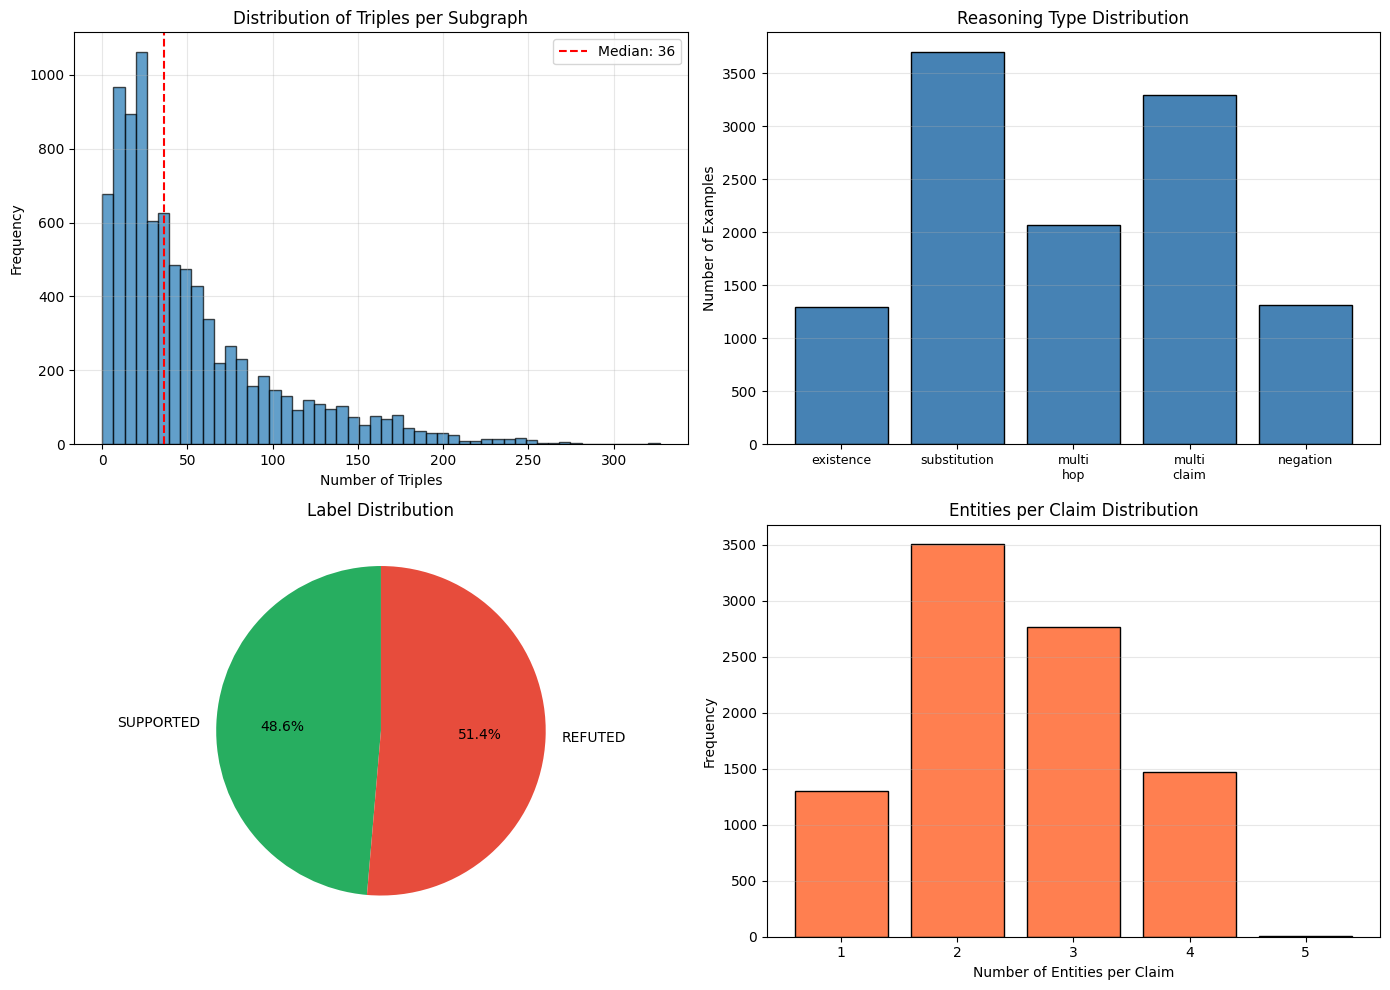


9. EXAMPLE CLAIMS FOR PAPER

Selecting representative examples...

Representative Examples:

1. EXISTENCE
   Claim: "I have heard that Mobyland had a successor."
   Entities: Mobyland
   Label: SUPPORTED

2. SUBSTITUTION
   Claim: "The successor to Gaston Flosse was called Nuihau Laurey."
   Entities: Gaston_Flosse, Nuihau_Laurey
   Label: REFUTED

3. MULTI HOP
   Claim: "Agra Airport is also located in a country where the leader is Narendra Modi."
   Entities: Agra_Airport, Narendra_Modi
   Label: SUPPORTED

4. MULTI CLAIM
   Claim: "Agra airport is in Nanticoke River with the ATA location identifier AGR."
   Entities: Agra_Airport, "AGR", Nanticoke_River
   Label: REFUTED

5. NEGATION
   Claim: "I understand that Acura is not a division of Honda."
   Entities: Honda, Acura
   Label: REFUTED

ANALYSIS COMPLETE


In [11]:
"""
Comprehensive FactKG Dataset Structure Analysis
Generates statistics and examples for paper
"""

import pickle
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

DATA_DIR = Path("data")
CLAIMS_PATH = DATA_DIR / "factkg/factkg_test.pickle"
SUBGRAPHS_PATH = DATA_DIR / "subgraphs/subgraphs_one_hop_test.pkl"

print("="*80)
print("FACTKG DATASET STRUCTURE ANALYSIS")
print("="*80)

# Load data
print("\nLoading data...")
with open(CLAIMS_PATH, 'rb') as f:
    claims_dict = pickle.load(f)

subgraphs_df = pd.read_pickle(SUBGRAPHS_PATH)

print(f"✓ Loaded {len(claims_dict)} claims")
print(f"✓ Loaded {len(subgraphs_df)} subgraphs")

# ============================================================================
# SECTION 1: Dataset Overview
# ============================================================================
print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)

print("\nOfficial Splits:")
print("  Training:   86,367 examples")
print("  Validation: 13,266 examples")
print("  Test:        9,041 examples")
print("  Total:     108,674 examples")

print("\nOur Analysis (Test Set):")
print(f"  Claims loaded: {len(claims_dict)}")
print(f"  Subgraphs loaded: {len(subgraphs_df)}")

# ============================================================================
# SECTION 2: Claim Structure
# ============================================================================
print("\n" + "="*80)
print("2. CLAIM STRUCTURE")
print("="*80)

# Analyze first few claims
print("\nClaim Dictionary Structure:")
print("  Type: dict")
print("  Key: Claim text (string)")
print("  Value: Dictionary with fields:")

first_key = list(claims_dict.keys())[0]
first_value = claims_dict[first_key]

print(f"\n  Available fields: {list(first_value.keys())}")

print("\n  Field Descriptions:")
print("    • Label: Truth value [True/False]")
print("    • Entity_set: List of entities mentioned in claim")
print("    • types: List of reasoning types required")

print("\nExample Entry:")
print(f"  Claim: \"{first_key}\"")
for k, v in first_value.items():
    print(f"    {k}: {v}")

# Label distribution
labels = [claim_meta['Label'][0] if isinstance(claim_meta['Label'], list) 
          else claim_meta['Label'] for claim_meta in claims_dict.values()]
label_counts = Counter(labels)

print("\nLabel Distribution:")
print(f"  SUPPORTED (True):  {label_counts[True]:5d} ({label_counts[True]/len(labels)*100:.1f}%)")
print(f"  REFUTED (False):   {label_counts[False]:5d} ({label_counts[False]/len(labels)*100:.1f}%)")

# ============================================================================
# SECTION 3: Entity Analysis
# ============================================================================
print("\n" + "="*80)
print("3. ENTITY ANALYSIS")
print("="*80)

entity_counts = []
for claim_meta in claims_dict.values():
    entities = claim_meta.get('Entity_set', [])
    entity_counts.append(len(entities))

print(f"\nEntities per Claim:")
print(f"  Mean:   {np.mean(entity_counts):.2f}")
print(f"  Median: {np.median(entity_counts):.0f}")
print(f"  Min:    {np.min(entity_counts)}")
print(f"  Max:    {np.max(entity_counts)}")
print(f"  Std:    {np.std(entity_counts):.2f}")

entity_dist = Counter(entity_counts)
print(f"\nDistribution:")
for n in sorted(entity_dist.keys())[:6]:
    print(f"  {n} entities: {entity_dist[n]:5d} claims ({entity_dist[n]/len(entity_counts)*100:.1f}%)")

# ============================================================================
# SECTION 4: Reasoning Types
# ============================================================================
print("\n" + "="*80)
print("4. REASONING TYPES")
print("="*80)

# Collect all reasoning types
all_types = []
type_combinations = []
for claim_meta in claims_dict.values():
    types = claim_meta.get('types', [])
    all_types.extend(types)
    type_combinations.append(tuple(sorted(types)))

type_counts = Counter(all_types)

print("\nReasoning Type Frequency:")
print(f"  {'Type':<25} {'Count':>6} {'Percentage':>10}")
print("  " + "-"*45)
for rtype, count in type_counts.most_common():
    print(f"  {rtype:<25} {count:>6} {count/len(claims_dict)*100:>9.1f}%")

# Primary reasoning categories
primary_types = ['existence', 'substitution', 'multi hop', 'multi claim', 'negation']
print("\n\nPrimary Reasoning Categories:")
for ptype in primary_types:
    count = sum(1 for cm in claims_dict.values() if ptype in cm.get('types', []))
    print(f"  {ptype:<15}: {count:5d} ({count/len(claims_dict)*100:.1f}%)")

# Reasoning type combinations
combo_counts = Counter(type_combinations)
print(f"\nMost Common Type Combinations (Top 10):")
for combo, count in combo_counts.most_common(10):
    combo_str = ", ".join(combo)
    print(f"  {count:5d}  {combo_str}")

# ============================================================================
# SECTION 5: Subgraph Structure
# ============================================================================
print("\n" + "="*80)
print("5. SUBGRAPH STRUCTURE")
print("="*80)

print("\nSubgraph DataFrame Structure:")
print(f"  Type: pandas.DataFrame")
print(f"  Columns: {list(subgraphs_df.columns)}")
print(f"  Rows: {len(subgraphs_df)}")

print("\n  'walked' field structure:")
first_walked = subgraphs_df.iloc[0]['walked']
if isinstance(first_walked, dict):
    print(f"    Type: dict")
    print(f"    Keys: {list(first_walked.keys())}")
    
    walkable = first_walked.get('walkable', [])
    connected = first_walked.get('connected', [])
    
    print(f"\n    • walkable: List of triples reachable via DBpedia properties")
    print(f"    • connected: List of triples with inverse/bidirectional relations")
    
    if walkable:
        print(f"\n    Triple format: (subject, predicate, object)")
        print(f"    Example: {walkable[0]}")

# ============================================================================
# SECTION 6: Subgraph Statistics
# ============================================================================
print("\n" + "="*80)
print("6. SUBGRAPH STATISTICS")
print("="*80)

# Collect subgraph statistics
triple_counts = []
node_counts = []
unique_relations = []

for idx, row in subgraphs_df.iterrows():
    walked_dict = row['walked']
    if isinstance(walked_dict, dict):
        triples = walked_dict.get('walkable', []) + walked_dict.get('connected', [])
        triple_counts.append(len(triples))
        
        # Count unique nodes
        nodes = set()
        relations = set()
        for s, p, o in triples:
            nodes.add(s)
            nodes.add(o)
            relations.add(p)
        
        node_counts.append(len(nodes))
        unique_relations.append(len(relations))

print(f"\nTriples per Subgraph:")
print(f"  Mean:        {np.mean(triple_counts):.2f}")
print(f"  Median:      {np.median(triple_counts):.0f}")
print(f"  Min:         {np.min(triple_counts)}")
print(f"  Max:         {np.max(triple_counts)}")
print(f"  Std:         {np.std(triple_counts):.2f}")
print(f"  25th %ile:   {np.percentile(triple_counts, 25):.0f}")
print(f"  75th %ile:   {np.percentile(triple_counts, 75):.0f}")
print(f"  95th %ile:   {np.percentile(triple_counts, 95):.0f}")

print(f"\nNodes per Subgraph:")
print(f"  Mean:        {np.mean(node_counts):.2f}")
print(f"  Median:      {np.median(node_counts):.0f}")
print(f"  Min:         {np.min(node_counts)}")
print(f"  Max:         {np.max(node_counts)}")

print(f"\nUnique Relations per Subgraph:")
print(f"  Mean:        {np.mean(unique_relations):.2f}")
print(f"  Median:      {np.median(unique_relations):.0f}")
print(f"  Min:         {np.min(unique_relations)}")
print(f"  Max:         {np.max(unique_relations)}")

# Truncation analysis (for BERT 512 token limit)
# Rough estimate: ~15 tokens per triple
def estimate_tokens(num_triples):
    return num_triples * 15

truncation_count = sum(1 for tc in triple_counts if estimate_tokens(tc) > 512)
print(f"\nTruncation Analysis (BERT 512-token limit):")
print(f"  Examples requiring truncation: {truncation_count} ({truncation_count/len(triple_counts)*100:.1f}%)")
print(f"  (Estimate: ~15 tokens per triple)")

# ============================================================================
# SECTION 7: Cross-Statistics
# ============================================================================
print("\n" + "="*80)
print("7. REASONING TYPE vs. SUBGRAPH SIZE")
print("="*80)

# Analyze subgraph size by reasoning type
claims_items = list(claims_dict.items())
type_to_triples = defaultdict(list)

for idx, (claim_text, claim_meta) in enumerate(claims_items):
    if idx >= len(subgraphs_df):
        continue
    
    reasoning_types = claim_meta.get('types', [])
    
    subgraph_row = subgraphs_df.iloc[idx]
    walked_dict = subgraph_row['walked']
    
    if isinstance(walked_dict, dict):
        triples = walked_dict.get('walkable', []) + walked_dict.get('connected', [])
        num_triples = len(triples)
        
        for rtype in reasoning_types:
            type_to_triples[rtype].append(num_triples)

print(f"\nAverage Triples by Reasoning Type:")
print(f"  {'Type':<25} {'Mean':>8} {'Median':>8} {'Max':>8}")
print("  " + "-"*55)
for rtype in sorted(type_to_triples.keys()):
    triples = type_to_triples[rtype]
    if len(triples) > 0:
        print(f"  {rtype:<25} {np.mean(triples):>8.1f} {np.median(triples):>8.0f} {np.max(triples):>8.0f}")

# ============================================================================
# SECTION 8: Generate Visualizations
# ============================================================================
print("\n" + "="*80)
print("8. GENERATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Triple distribution
ax1 = axes[0, 0]
ax1.hist(triple_counts, bins=50, edgecolor='black', alpha=0.7)
ax1.axvline(np.median(triple_counts), color='red', linestyle='--', label=f'Median: {np.median(triple_counts):.0f}')
ax1.set_xlabel('Number of Triples')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Triples per Subgraph')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Reasoning type frequency
ax2 = axes[0, 1]
primary_counts = [sum(1 for cm in claims_dict.values() if ptype in cm.get('types', [])) 
                  for ptype in primary_types]
ax2.bar(range(len(primary_types)), primary_counts, color='steelblue', edgecolor='black')
ax2.set_xticks(range(len(primary_types)))
ax2.set_xticklabels([t.replace(' ', '\n') for t in primary_types], fontsize=9)
ax2.set_ylabel('Number of Examples')
ax2.set_title('Reasoning Type Distribution')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Label distribution
ax3 = axes[1, 0]
labels_list = ['SUPPORTED', 'REFUTED']
label_values = [label_counts[True], label_counts[False]]
colors = ['#27AE60', '#E74C3C']
ax3.pie(label_values, labels=labels_list, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Label Distribution')

# Plot 4: Entity count distribution
ax4 = axes[1, 1]
entity_count_data = [entity_dist[i] for i in range(1, 6)]
ax4.bar(range(1, 6), entity_count_data, color='coral', edgecolor='black')
ax4.set_xlabel('Number of Entities per Claim')
ax4.set_ylabel('Frequency')
ax4.set_title('Entities per Claim Distribution')
ax4.set_xticks(range(1, 6))
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('factkg_dataset_statistics.png', dpi=300, bbox_inches='tight')
plt.savefig('factkg_dataset_statistics.pdf', bbox_inches='tight')
print("\n✓ Saved: factkg_dataset_statistics.png/pdf")

plt.show()

# ============================================================================
# SECTION 9: Example Claims for Paper
# ============================================================================
print("\n" + "="*80)
print("9. EXAMPLE CLAIMS FOR PAPER")
print("="*80)

print("\nSelecting representative examples...")

example_claims = []

# Select one example per reasoning type
for target_type in primary_types:
    for claim_text, claim_meta in claims_dict.items():
        types = claim_meta.get('types', [])
        if target_type in types:
            label = claim_meta['Label'][0] if isinstance(claim_meta['Label'], list) else claim_meta['Label']
            example_claims.append({
                'claim': claim_text,
                'label': 'SUPPORTED' if label else 'REFUTED',
                'entities': claim_meta.get('Entity_set', []),
                'primary_type': target_type
            })
            break

print("\nRepresentative Examples:")
for i, ex in enumerate(example_claims, 1):
    print(f"\n{i}. {ex['primary_type'].upper()}")
    print(f"   Claim: \"{ex['claim']}\"")
    print(f"   Entities: {', '.join(ex['entities'])}")
    print(f"   Label: {ex['label']}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)